# <div align = "center">Factors Determining Auto Loan Sanction Amount  <div align = "center">

# TABLE OF CONTENTS

## 1. Motivation of Topic
## 2. Dataset Description
### 2.1 Data Source
### 2.2 Variable Description
## 3. Variable Selection: Boruta Algorithm
## 4. Descriptive Analysis
### 4.1 Histograms, Quantile Plots, and Box-Plots
### 4.2 Correlation Plots
### 4.3 Density Plots
### 4.4 Checking for Null Values
### 4.5 Non-linearities and Transformations
## 5. Model Selection
### 5.1 Mallow's CP : Identifying the Top Competing Models
### 5.2 OLS Model: Preliminary Analysis
### 5.3 Test for Multicollinearity: Variance Inflation Factor (VIF)
### 5.4 Test for Heteroskedasticity
#### 5.4.1 Spread Level Plots
#### 5.4.2 Bruesch-Pagan Test
### 5.5 Diagnostic Plots
#### 5.5.1 Cook's Distance Plots
#### 5.5.2 Influence Plots
#### 5.5.3 Residual Plots
#### 5.5.4 Dropping Influential Observations
### 5.6 Test for Model Misspecification : Ramsey RESET
### 5.7 Mitigation of Issues and Amending Model
#### 5.7.1 Mitigation of Multicollinearity
#### 5.7.3 Identifying Potential Quadratic Terms
### 5.8 Final Best Fitted Model
#### 5.8.1 Robustness Check: Bootstrapping
#### 5.8.2 Robustness Check: Cross Validation for Model Performance Evaluation
### 5.9 Results and Conclusion
#### 5.9.1 Statistical and Economic Significance
#### 5.9.2 Facilitating Potential Recommendations

### Importing Packages

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from RegscorePy import mallow

In [1]:
import csv
import math 
import itertools
import BorutaShap
import RegscorePy
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import nan
import scipy.stats as stats
from RegscorePy import mallow
import matplotlib.pyplot as plt
from BorutaShap import BorutaShap
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm

## 1. Motivation of Topic

Among the goods and services that got more expensive in 2021, perhaps the most astonishing price hike of all was for automobiles. The average price of vehicles increased more than any other major category in the consumer price index, except for energy. Even though the prices increases, automobiles continue to be more or less a necessary good, hence pushing people to depend on credit through banking agencies. Our study thus aims to ascertain factors which impact the amount of loan that is sanctioned to the consumer based on the various characteristics of the individual and the health of their banking habits.

## 2. Dataset Description

### 2.1 Data Source
We downloaded our dataset from Kaggle, where the loan data was provided by an Auto Credit Agency based in China.

### 2.2 Variable Description
* **Response Variable - main_account_sanction_loan:** This indicates the amount of loan that is given to an individual
* **Predictor Variable 1 - asset_cost:** The amount that an individual needs to spend to buy the autombile. This asset cost mostly determines how much loan the consumer is going to avail
* **Predictor Variable 2 - driving_flag:**  This categorical variable indicates that whether having a driving license affects the loan sanction amount 
* **Predictor Variable 3 - credit_score:** A credit score is the numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual
* **Predictor Variable 4 - main_account_monthly_payment:** This variable signifies the monthly installment size of the potential loan
* **Predictor Variable 5 - last_six_month_default_no:** This factor determines how much loan the consumer is going to get based on his default history
* **Predictor Variable 6 - average_age:** This refers to the average loan term
* **Predictor Variable 7 - credit_history:** A credit history is a record of a borrower's responsible repayment of debts
* **Predictor Variable 8 - enquiry_no:** This signifies whether the loan sanction amount depends on the number of queries the consumer has on the loan features. 
* **Predictor Variable 9 - loan_default:** This is a categorical variable. It refers to the fact whether the customer is overdue or not. Whether he has not paid the installment on time. If not, he will be susceptible to defaulting if loan is sanctioned to him 
* **Predictor Variable 10 - loan_to_asset ratio:** Determining the size of the loan relative to his asset value
* **Predictor Variable 11 - total_outstanding_loan:** The amount of outstanding loan a person has currently
* **Predictor Variable 12 - total_monthly_payment:** This refers to the fact that in total how much the customer is obligated to pay against his all existing loan accounts
* **Predictor Variable 13 - main_account_tenure:** The time period that the individual has had an account with the credit agency
* **Predictor Variable 14 - credit_level:** This is an important deteriming factor of loan sanction amount 
* **Predictor Variable 15 - employment_type:** The type of employment that a person has
* **Predictor Variable 16 - age:** Age of the individual


## 3. Variable Selection : Boruta Algorithm

In [3]:
df=pd.read_csv("data3.csv")
df

,main_account_sanction_loan,asset_cost,Driving_flag,credit_score,main_account_monthly_payment,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_default,loan_to_asset_ratio,total_outstanding_loan,total_monthly_payment,main_account_tenure,Credit_level,employment_type,age
0,30838,105200,0,749,0,0,1,30,0,0,0.553793,16582,0,30838,11,0,25
1,374641,58085,0,588,9823,0,14,36,0,0,0.874632,375168,9823,38,5,1,26
2,9910,65560,0,738,1751,0,3,3,1,0,0.747453,5080,1751,5,11,0,22
3,53000,65090,0,774,3320,0,13,13,0,0,0.748855,4700,3320,15,12,0,37
4,1826104,67343,0,636,9646,1,12,25,0,0,0.839003,1359538,9646,190,7,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,390951,53630,0,771,550,0,16,24,0,0,0.768413,382749,550,709,12,1,47
1227,48070,66000,0,774,1876,0,33,33,0,0,0.871409,8090,1876,25,12,0,56
1228,51000,77766,0,624,0,0,24,30,0,0,0.643469,3322,0,51000,6,0,33
1229,34,67000,0,595,5511,0,38,52,0,0,0.877000,34,5511,0,5,1,27


In [4]:
df.describe()

,main_account_sanction_loan,asset_cost,Driving_flag,credit_score,main_account_monthly_payment,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_default,loan_to_asset_ratio,total_outstanding_loan,total_monthly_payment,main_account_tenure,Credit_level,employment_type,age
count,1.231000e+03,1231.000000,1231.000000,1231.000000,1.231000e+03,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03,1.231000e+03,1.231000e+03,1231.000000,1231.000000,1231.000000
mean,5.194626e+05,75814.178716,0.023558,594.215272,2.879408e+04,0.217709,15.831032,26.279448,0.316003,0.153534,0.729158,4.155082e+05,2.889005e+04,1.174379e+05,7.306255,0.494720,36.183591
std,1.125146e+06,20538.364418,0.151729,215.322813,1.457320e+05,0.585498,15.933420,23.158378,0.812541,0.360648,0.114174,9.719144e+05,1.457288e+05,4.905725e+05,4.150575,0.534741,9.785858
min,1.300000e+01,41150.000000,0.000000,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.212312,-2.368440e+05,0.000000e+00,0.000000e+00,-1.000000,0.000000,18.000000
25%,4.006650e+04,65631.500000,0.000000,549.000000,0.000000e+00,0.000000,5.000000,9.000000,0.000000,0.000000,0.667072,1.442450e+04,0.000000e+00,1.100000e+01,4.000000,0.000000,28.000000
50%,1.138000e+05,70000.000000,0.000000,680.000000,2.644000e+03,0.000000,13.000000,19.000000,0.000000,0.000000,0.749412,6.273200e+04,2.658000e+03,6.000000e+01,8.000000,0.000000,35.000000
75%,4.880450e+05,78283.000000,0.000000,738.000000,1.008150e+04,0.000000,20.000000,37.000000,0.000000,0.000000,0.815883,3.308505e+05,1.047350e+04,3.856600e+04,11.000000,1.000000,43.000000
max,1.237635e+07,286350.000000,1.000000,879.000000,2.658172e+06,8.000000,117.000000,116.000000,8.000000,1.000000,0.929572,8.731477e+06,2.658172e+06,8.583601e+06,13.000000,2.000000,63.000000


In [6]:
from BorutaShap import BorutaShap

In [5]:
boruta_data = df.copy()

In [8]:
x = boruta_data.iloc[:, 1:]
y = boruta_data['main_account_sanction_loan']

  0%|          | 0/200 [00:00<?, ?it/s]

6 attributes confirmed important: ['credit_history', 'average_age', 'total_monthly_payment', 'total_outstanding_loan', 'main_account_monthly_payment', 'main_account_tenure']
10 attributes confirmed unimportant: ['Credit_level', 'employment_type', 'loan_to_asset_ratio', 'credit_score', 'last_six_month_defaulted_no', 'loan_default', 'Driving_flag', 'enquirie_no', 'age', 'asset_cost']
0 tentative attributes remains: []


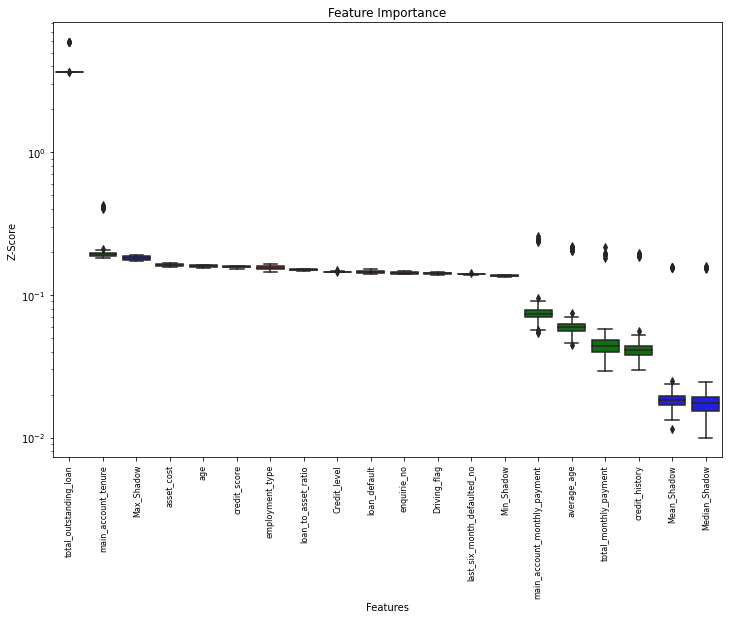

In [9]:
Feature_Selector = BorutaShap(importance_measure = 'shap', classification = False)
Feature_Selector.fit(X = x, y=y, n_trials = 200, random_state = 0)
Feature_Selector.plot(which_features = 'all')

Based on the results obtained for the Boruta Algorithm, we get 6 confirmed attributes, namely: 'credit_history', 'average_age', 'total_monthly_payment', 'total_outstanding_loan', 'main_account_monthly_payment', and 'main_account_tenure.' Henceforth, we move forward with these variables for our analysis.

## 4. Descriptive Analysis

### 4.1 Histogram, Quantile Plots, and Box-Plot

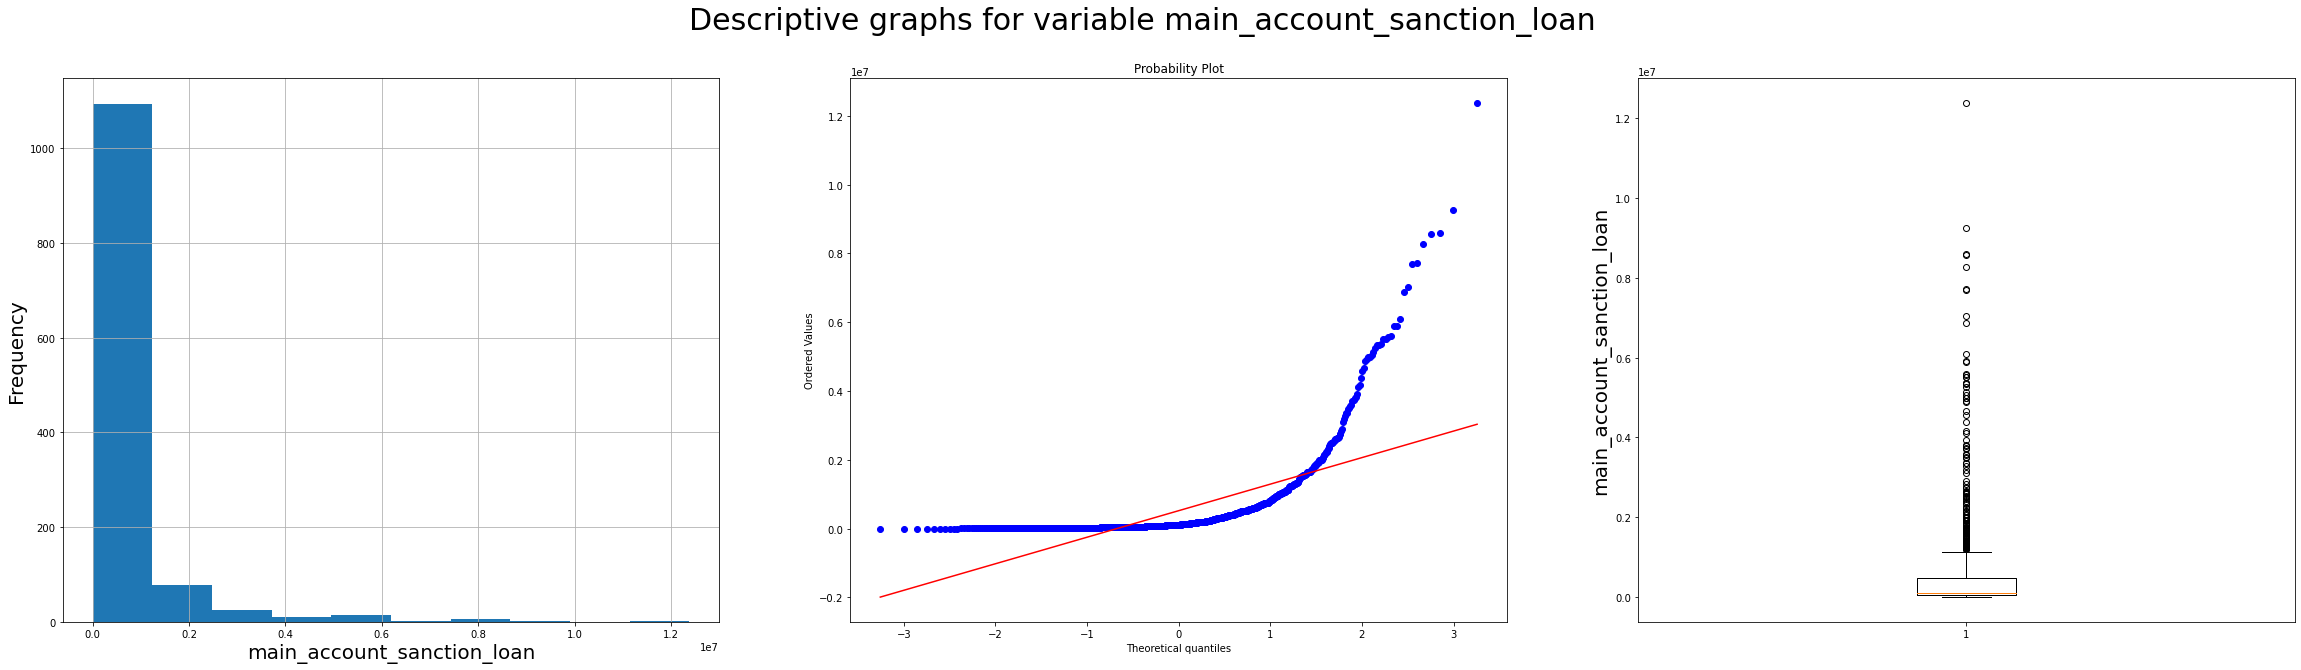

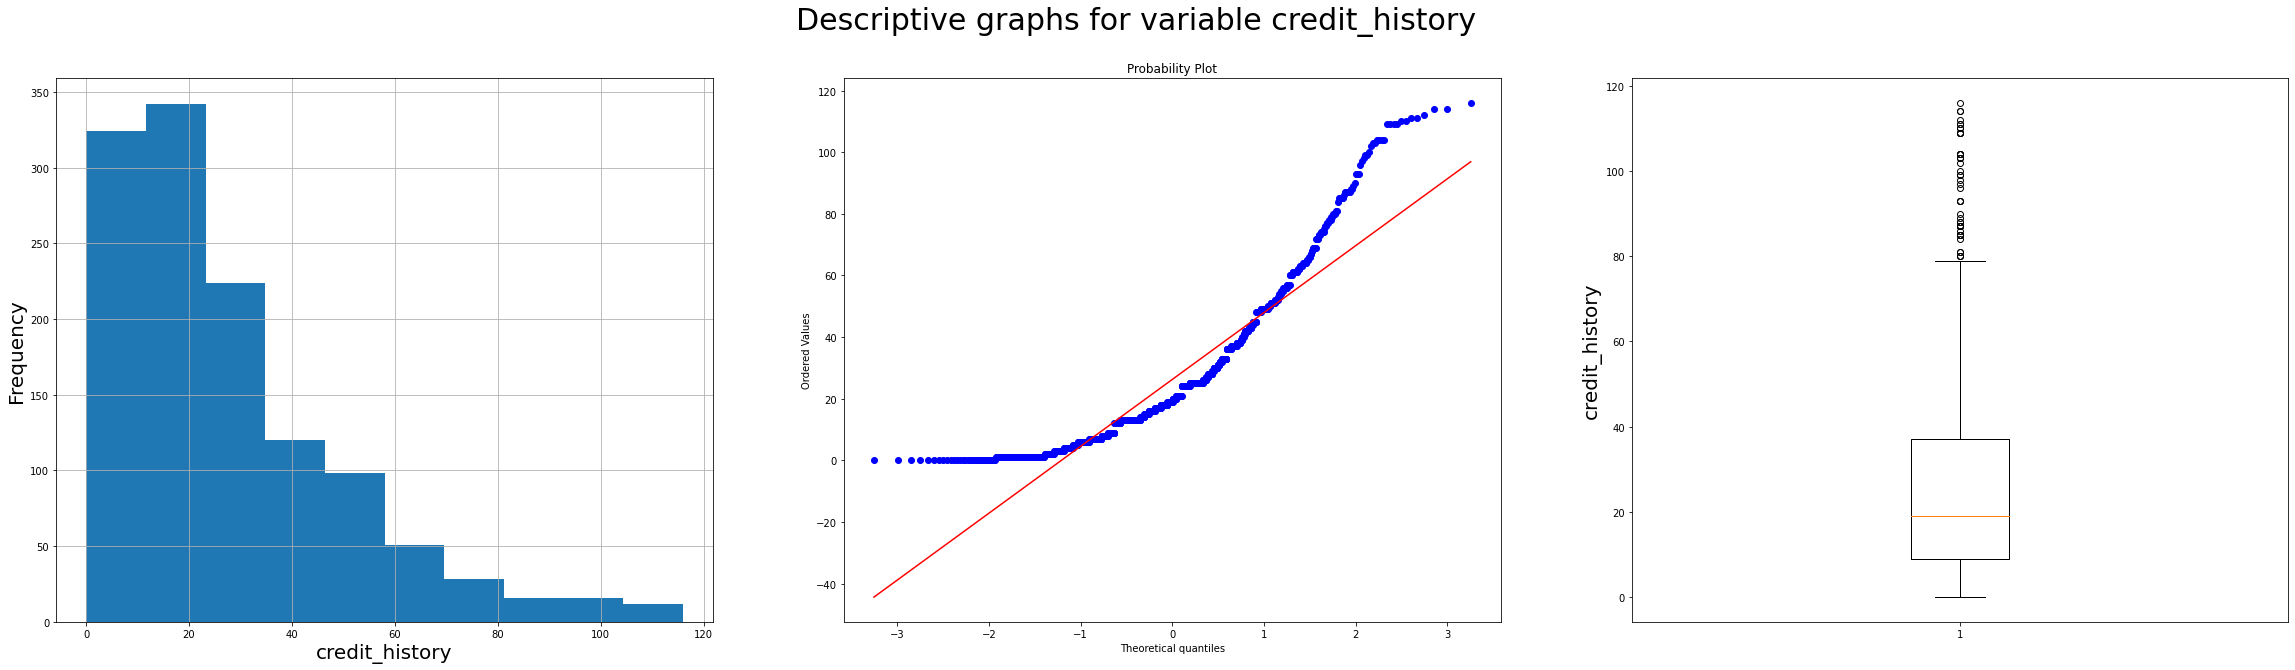

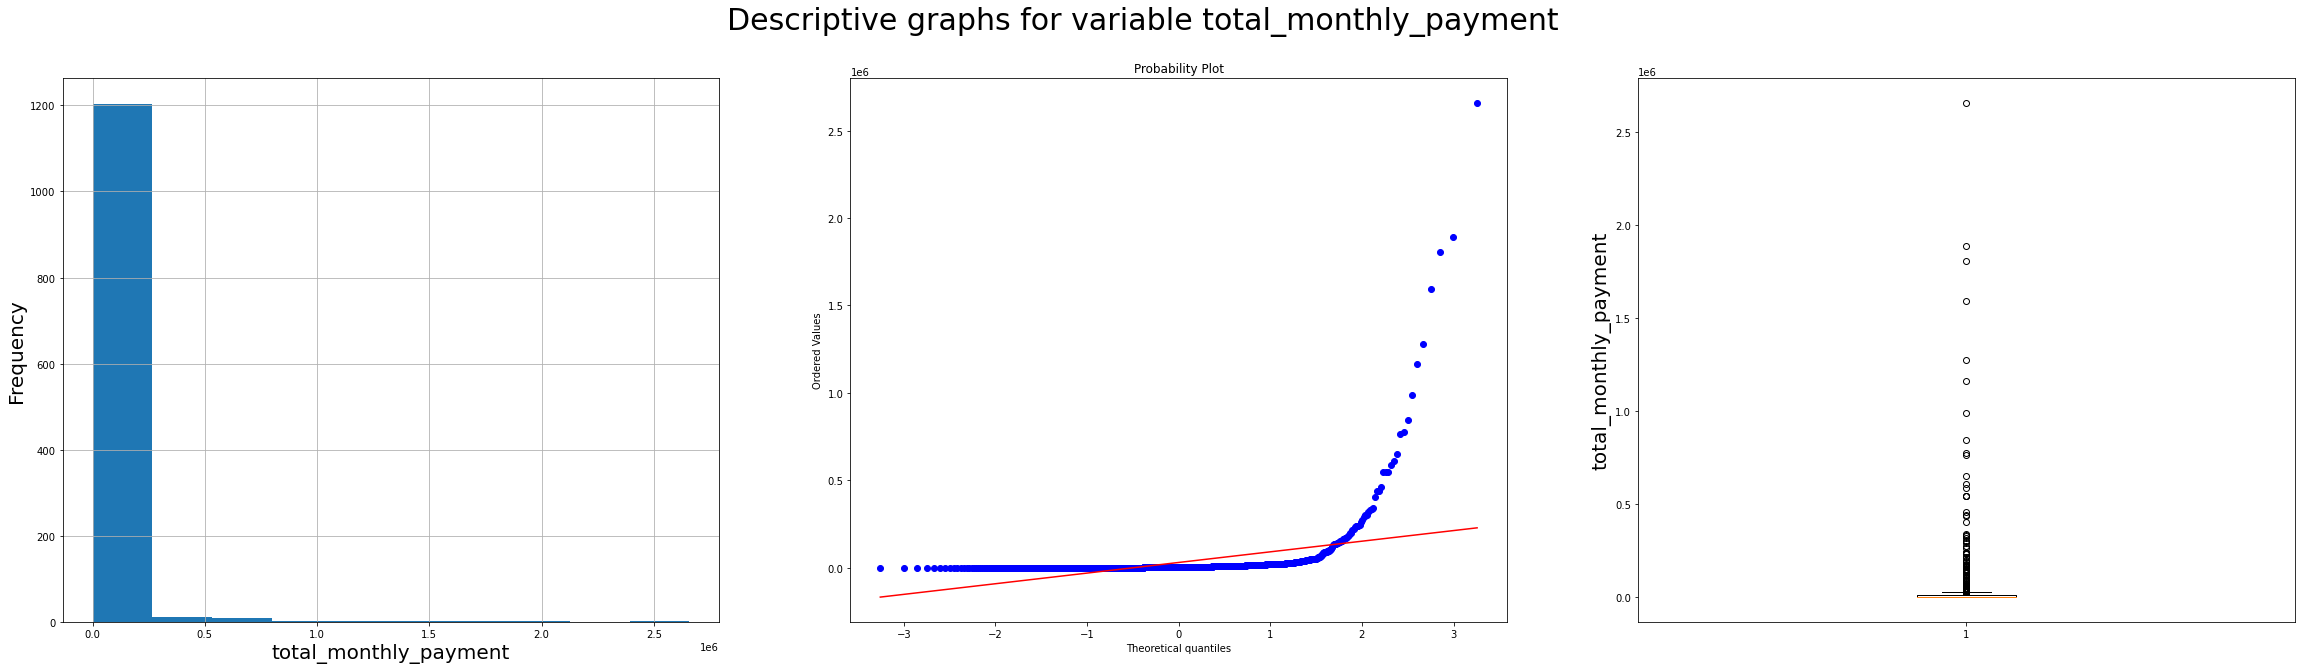

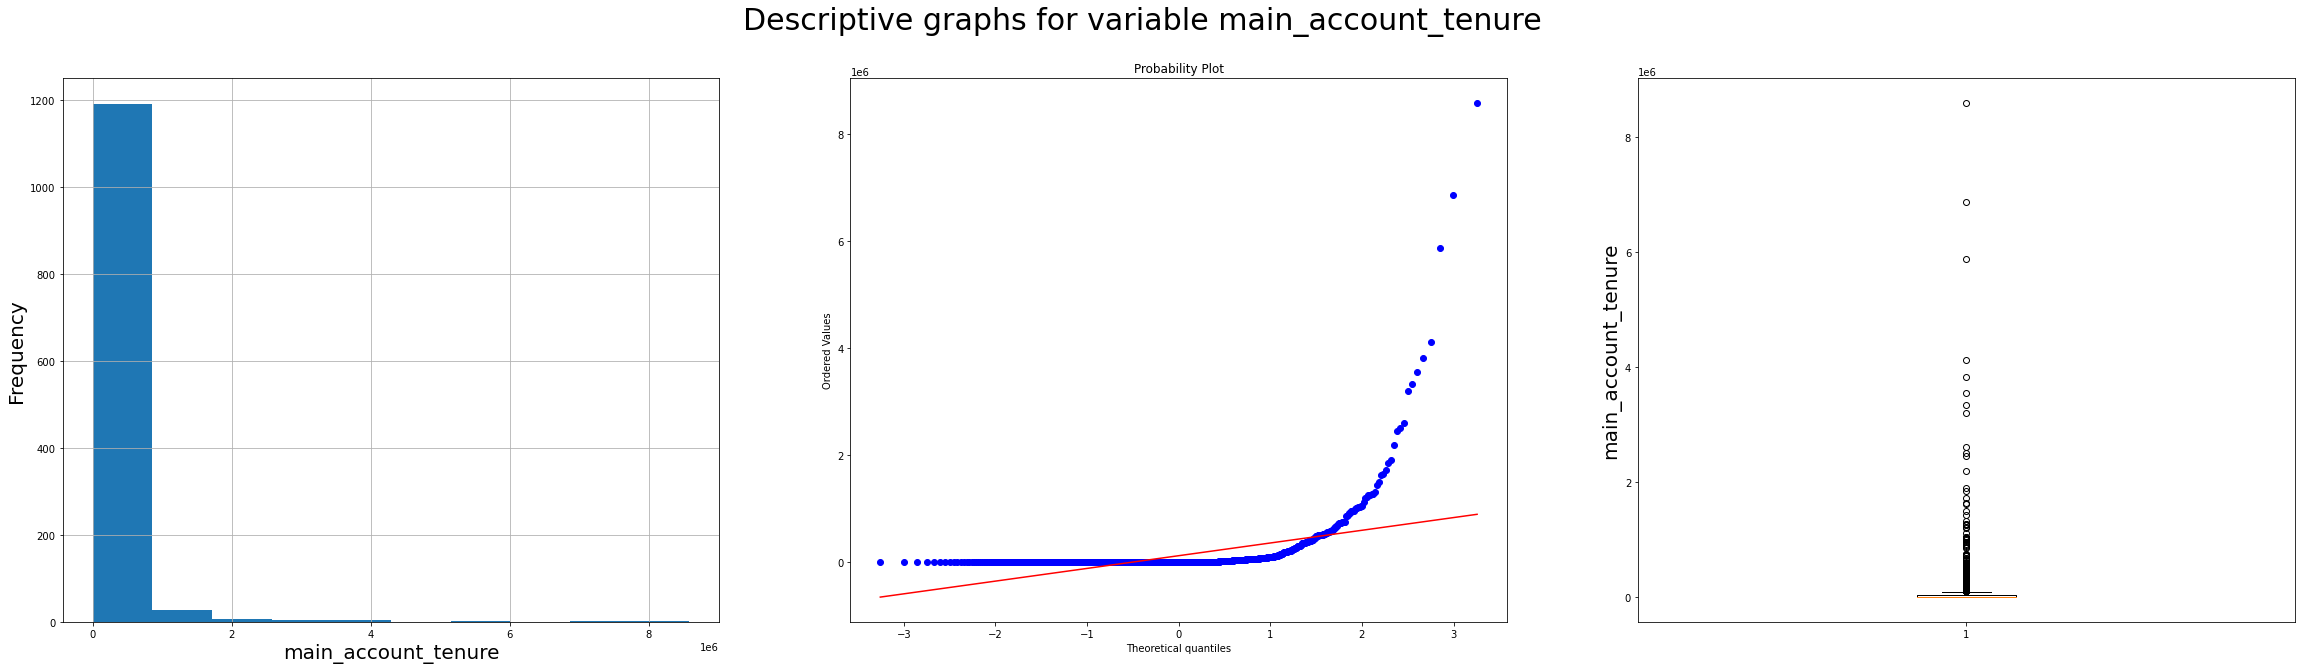

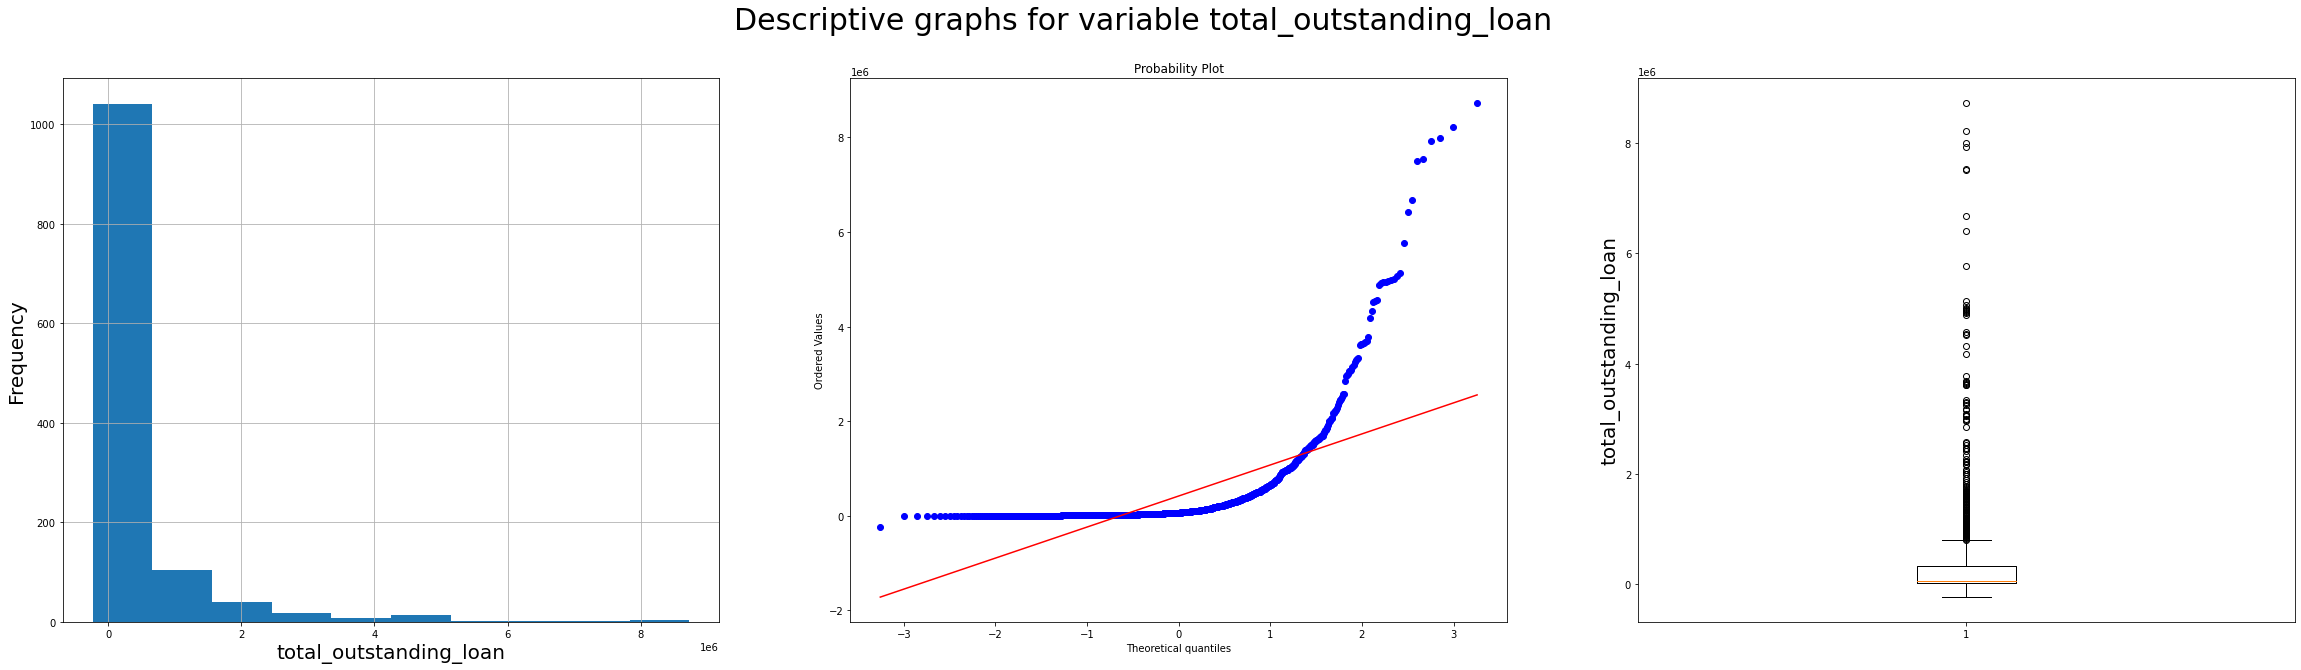

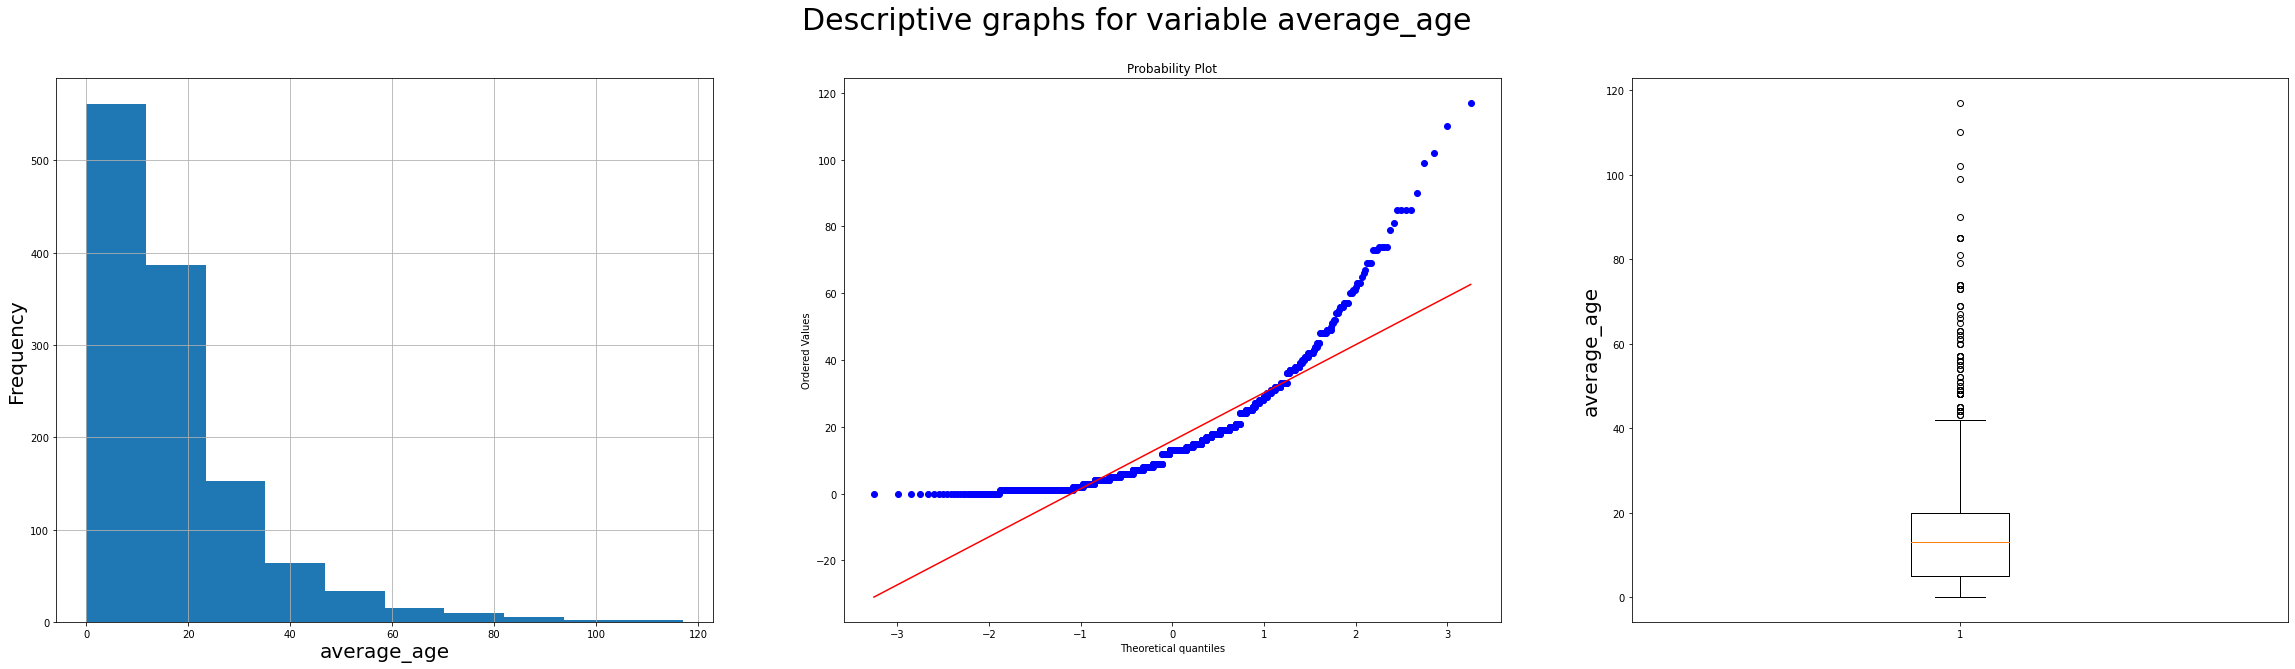

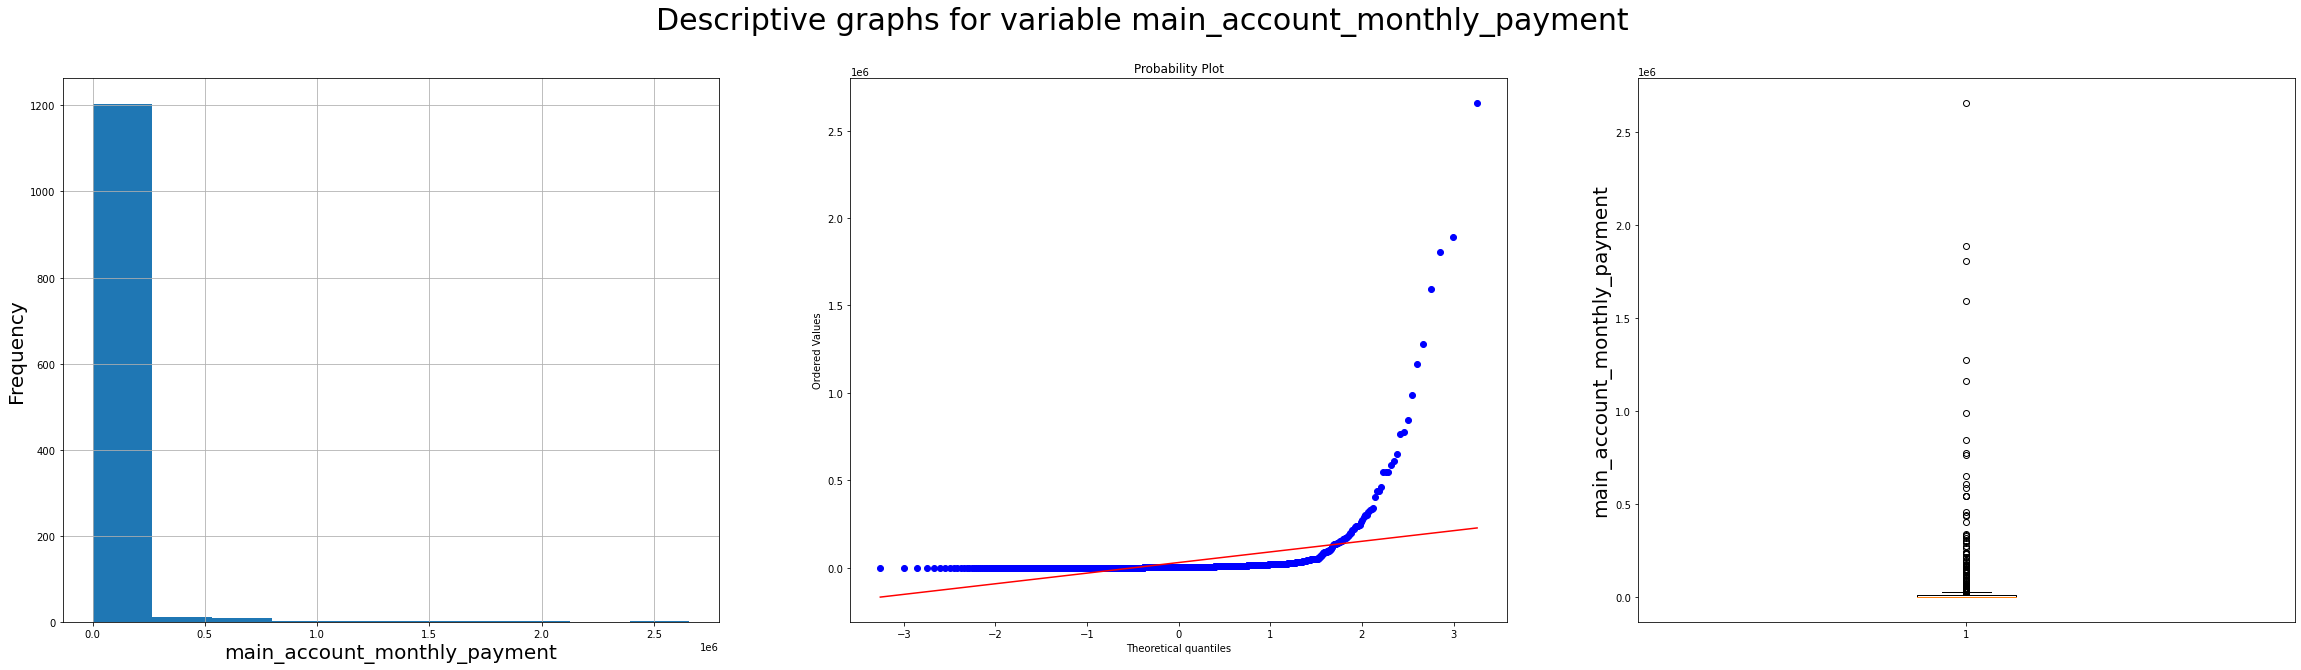

In [9]:
variables= ['main_account_sanction_loan','credit_history', 'total_monthly_payment', 'main_account_tenure', 
              'total_outstanding_loan','average_age', 'main_account_monthly_payment']

for i in variables:
    plt.figure(figsize = (40,10))
    plt.suptitle("Descriptive graphs for variable " +i, size =30)
    
    plt.subplot(1,3,1)
    df[i].hist()
    #plt.grid(False)
    plt.xlabel(i, size = 20)
    plt.ylabel("Frequency", size = 20)

    plt.subplot(1,3,2)
    stats.probplot(df[i], dist="norm", plot=plt)

    plt.subplot(1,3,3)
    plt.boxplot(df[i])
    plt.ylabel(i, size = 20)

    plt.show()

### 4.2 Correlation Plot

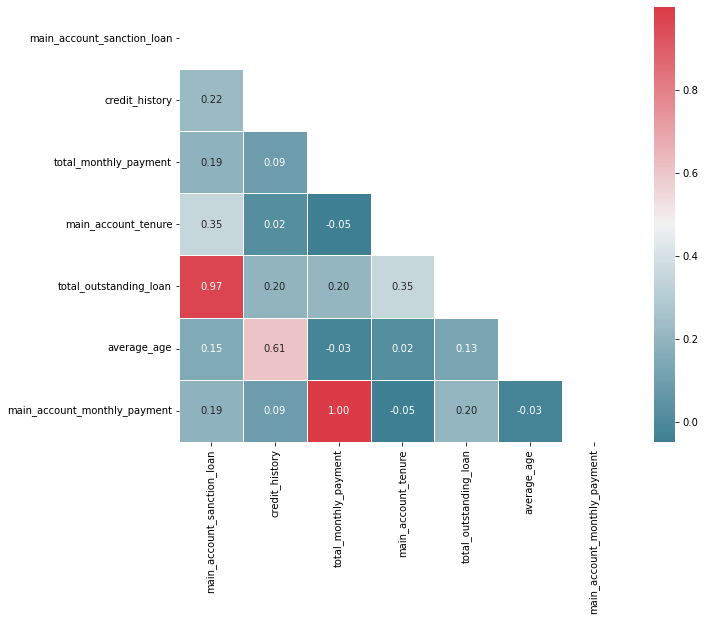

In [87]:
sub_df =  df[['main_account_sanction_loan','credit_history', 'total_monthly_payment', 'main_account_tenure', 
              'total_outstanding_loan','average_age', 'main_account_monthly_payment']]
corr = sub_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

### 4.3 Density Plot

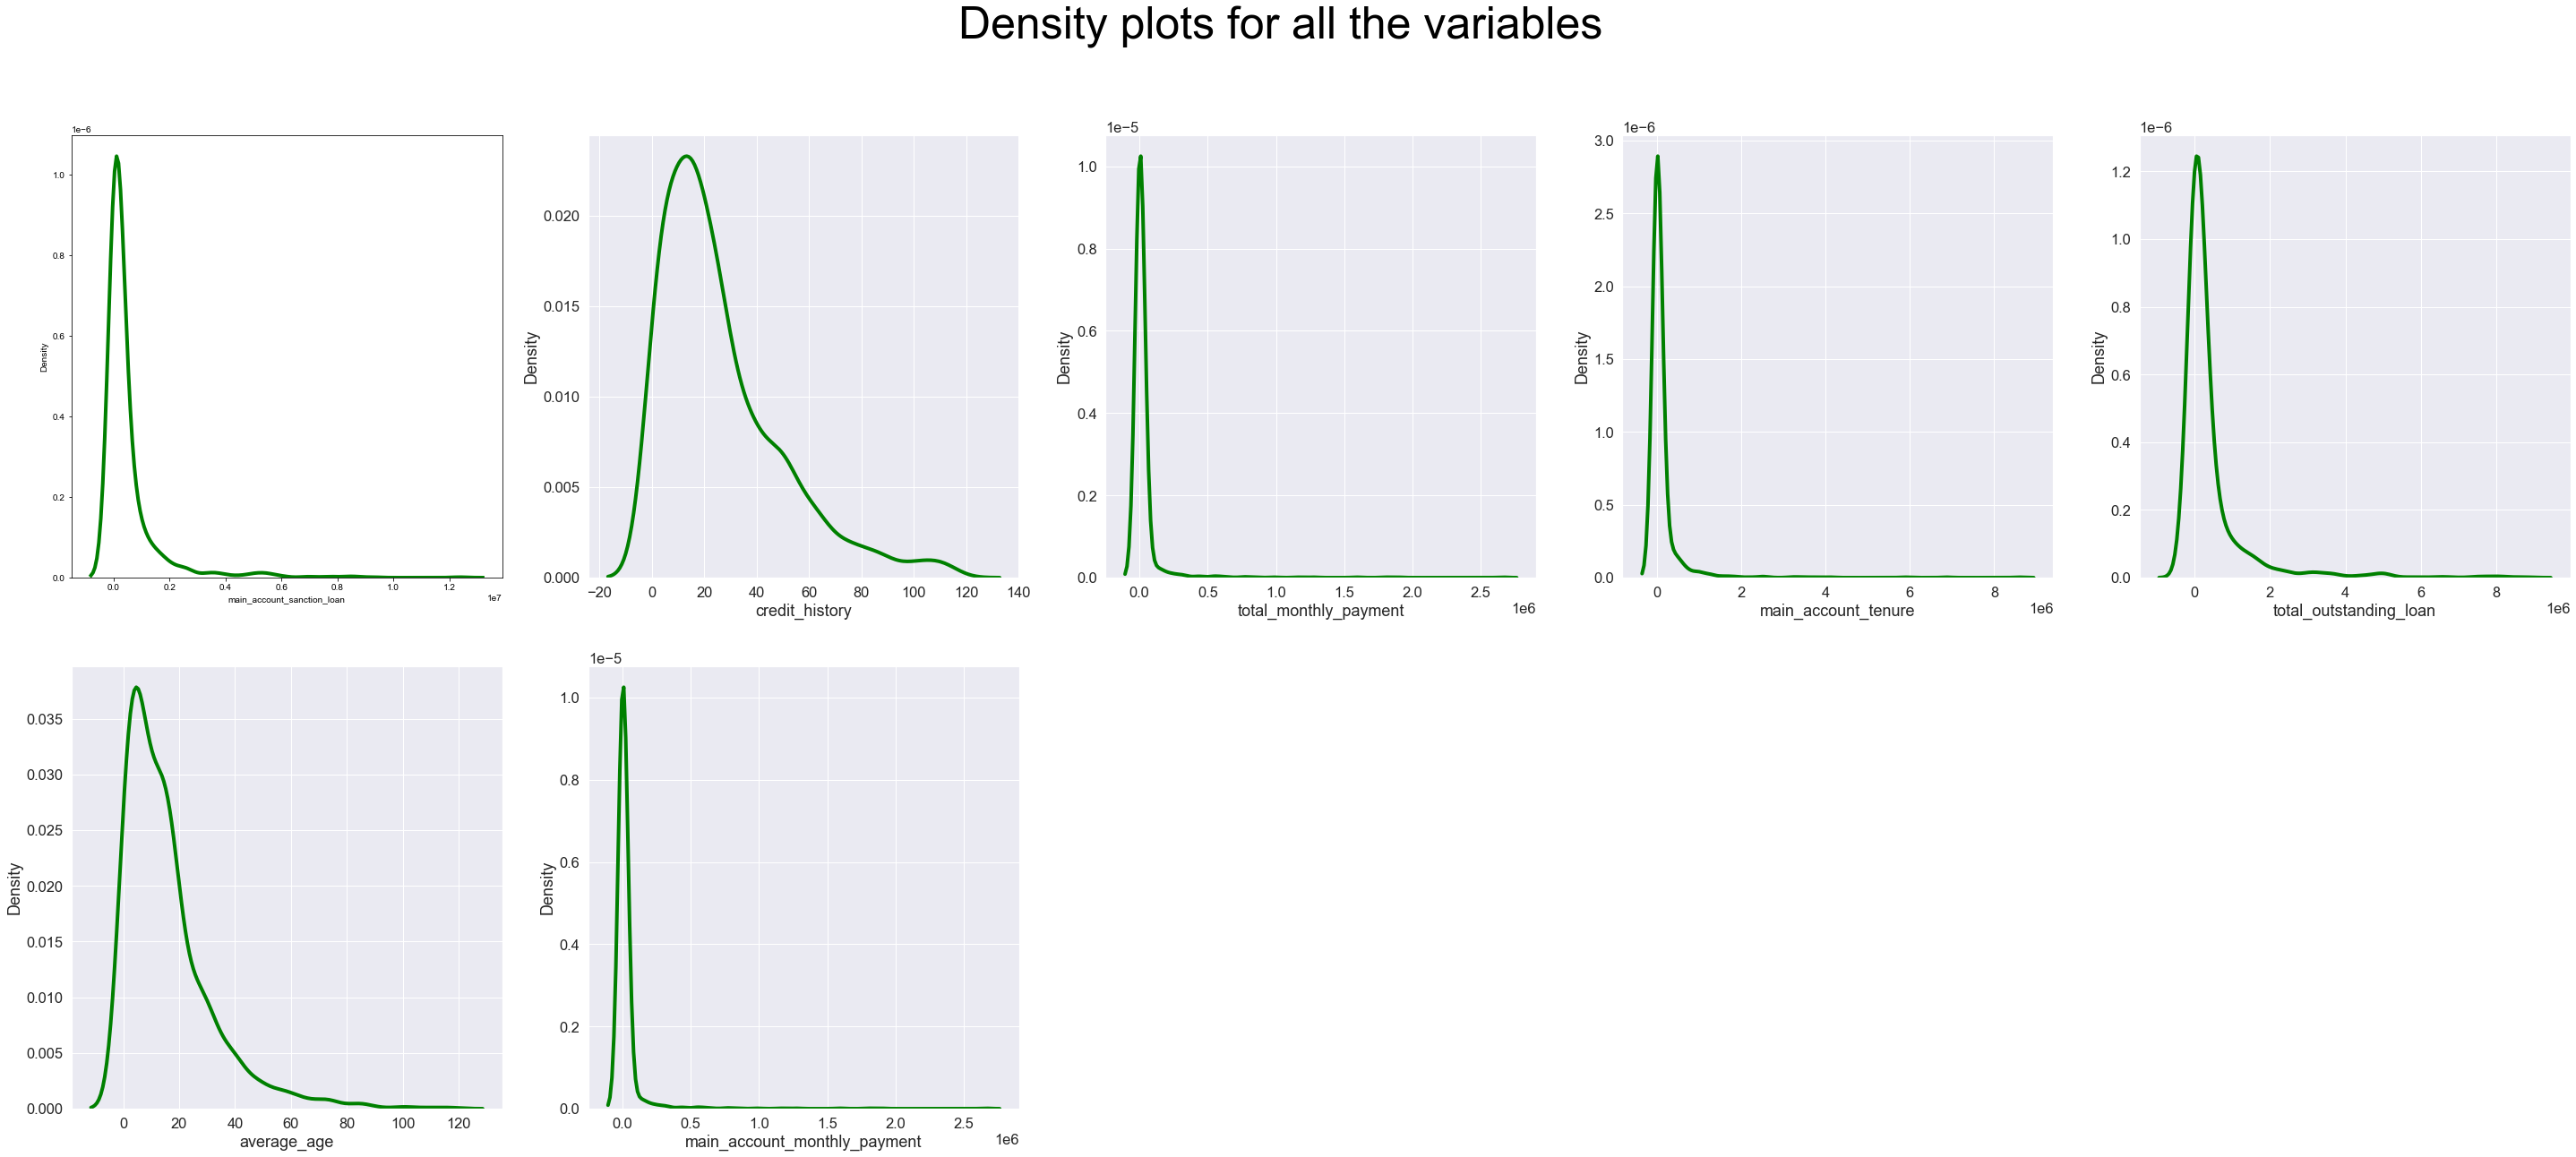

In [10]:
variables= ['main_account_sanction_loan','credit_history', 'total_monthly_payment', 'main_account_tenure', 
              'total_outstanding_loan','average_age', 'main_account_monthly_payment']
plt.figure(figsize = (50,20))
plt.suptitle("Density plots for all the variables", size =50)
pos = 1
for i in variables:
    plt.subplot(2,5,pos)
    sns.kdeplot(df[i], color = "green", linewidth =4)
    sns.set(font_scale=1.5)
    pos = pos+1
plt.show()

### 4.4 Checking for Null Values

In [7]:
df.isnull().any() 

main_account_sanction_loan      False
asset_cost                      False
Driving_flag                    False
credit_score                    False
main_account_monthly_payment    False
last_six_month_defaulted_no     False
average_age                     False
credit_history                  False
enquirie_no                     False
loan_default                    False
loan_to_asset_ratio             False
total_outstanding_loan          False
total_monthly_payment           False
main_account_tenure             False
Credit_level                    False
employment_type                 False
age                             False
dtype: bool

Since no null values exist in our dataset, we do not need to mend the values.

### 4.5 Non-linearities and Transformations

#### What would happen if you included non-linear variables in your regression models without transforming them first?

Including non-linear variables in a regression without conducting a linear transformation will result in a non-linear relationship. This means that changes in the output do not change in direct proportion to changes in any of the inputs. 

Thus, using **Box-Cox tests**, we will determine the power transformation required for our predictor variables.

In [11]:
# checking which vars have 0 and/or negative observations
boruta=['main_account_sanction_loan', 'credit_history', 'average_age', 'total_monthly_payment', 'total_outstanding_loan', 
        'main_account_monthly_payment', 'main_account_tenure']
for i in boruta:
    print(i, len(df[df[i] <= 0]))

main_account_sanction_loan 0
credit_history 33
average_age 36
total_monthly_payment 427
total_outstanding_loan 64
main_account_monthly_payment 428
main_account_tenure 56


So all variables must run through Yeo-Johnson test except the response variable

In [12]:
#running box-cox for response variable
print("Lambda of main_account_sanction_loan is:", stats.boxcox(df["main_account_sanction_loan"])[1])

Lambda of main_account_sanction_loan is: 0.044874866329183354


Thus, can run log transformation for the response variable.

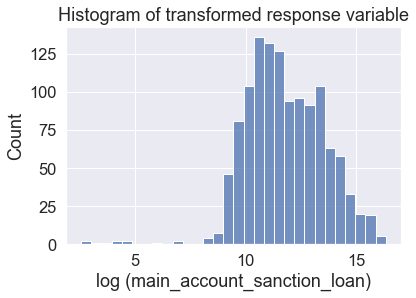

In [13]:
# transforming the variable and visualising the change
sns.histplot(np.log(df["main_account_sanction_loan"]))
plt.xlabel("log (main_account_sanction_loan)")
plt.title("Histogram of transformed response variable")

plt.show()

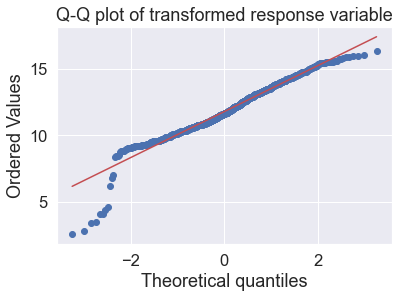

In [14]:
stats.probplot(np.log(df["main_account_sanction_loan"]), dist="norm", plot=plt)
plt.title("Q-Q plot of transformed response variable")
plt.show()

Running Yeo-Johnson test for remaining variables

In [15]:
variables_subset = ['credit_history', 'average_age', 'total_monthly_payment', 'total_outstanding_loan', 
                    'main_account_monthly_payment', 'main_account_tenure']
for i in variables_subset:
    print("Lambda of", i, "is:", stats.yeojohnson(df[i])[1])

Lambda of credit_history is: 0.296818228338479
Lambda of average_age is: 0.1715746560114258
Lambda of total_monthly_payment is: 0.07058843304531072
Lambda of total_outstanding_loan is: 0.8433379408877208
Lambda of main_account_monthly_payment is: 0.07046382030331116
Lambda of main_account_tenure is: -0.09875288552724643


All variables have a lambda close to 0 except total_outstanding_loan. Hence, all the remaining 5 variables must undergo a log transformation for linearisation.

In [8]:
#adding a jitter to these variables to perform log transformation

df['credit_history'] = df['credit_history'] + 0.00001
df['average_age'] = df['average_age'] + 0.00001
df['total_monthly_payment'] = df['total_monthly_payment'] + 0.00001 
df['main_account_monthly_payment'] = df['main_account_monthly_payment'] + 0.00001 
df['main_account_tenure'] = df['main_account_tenure'] + 0.00001

In [17]:
#running transformations and visualising impact

#dropping total_outstanding_loan from list to run a loop
variables_subset.remove('total_outstanding_loan')

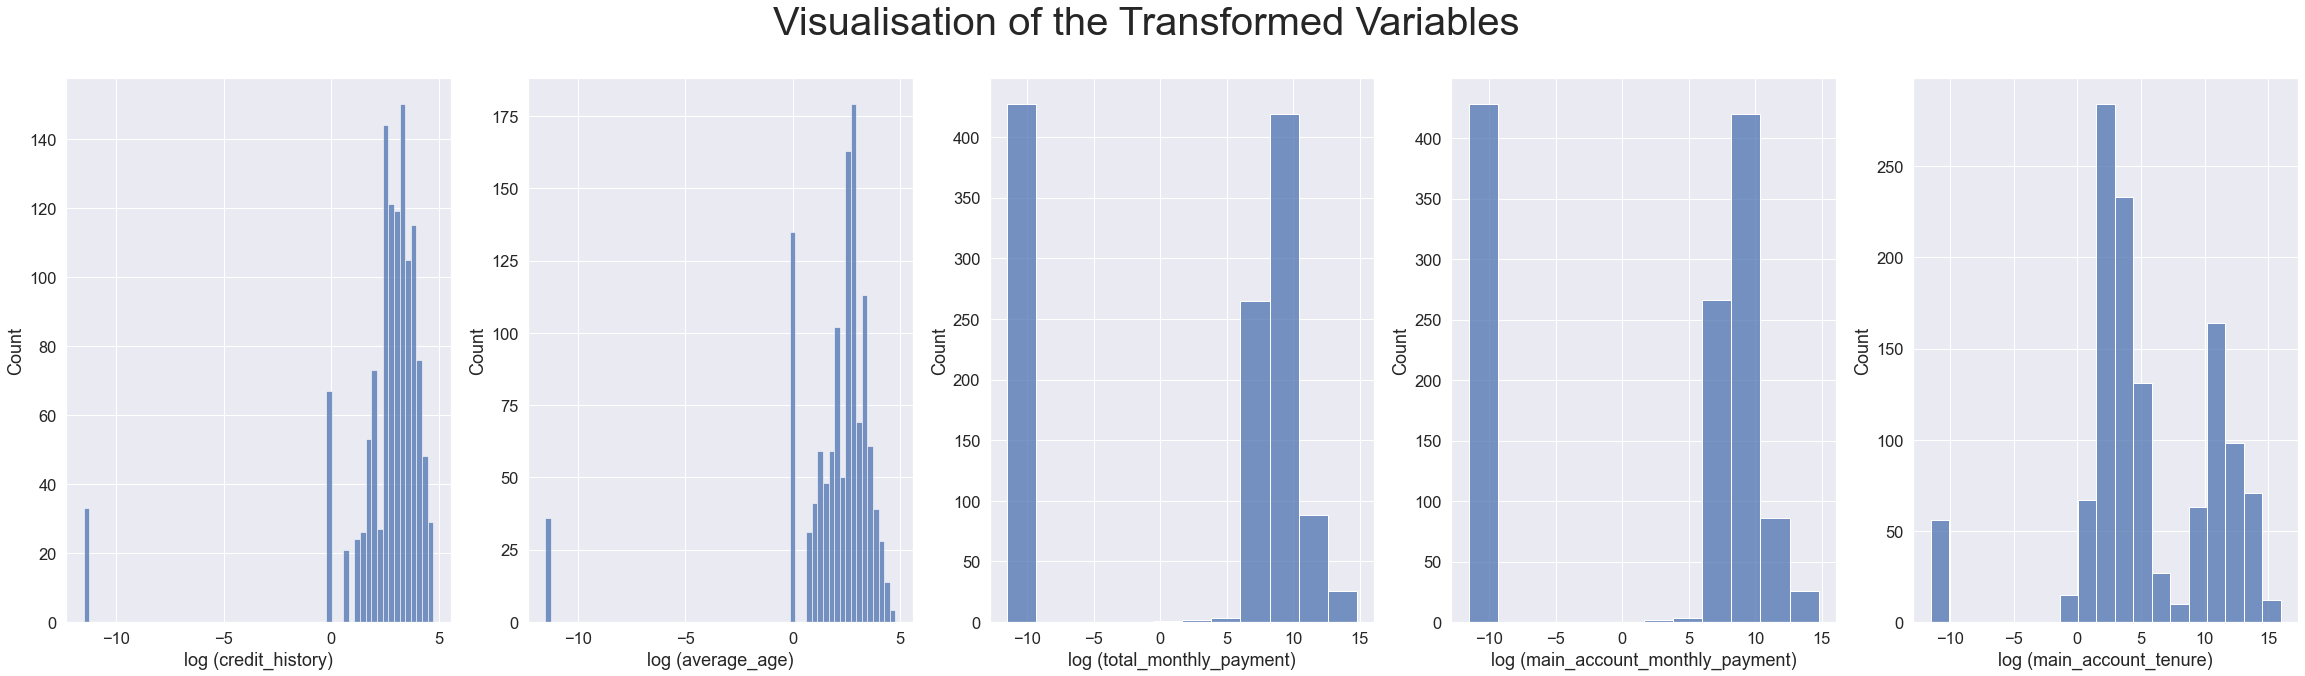

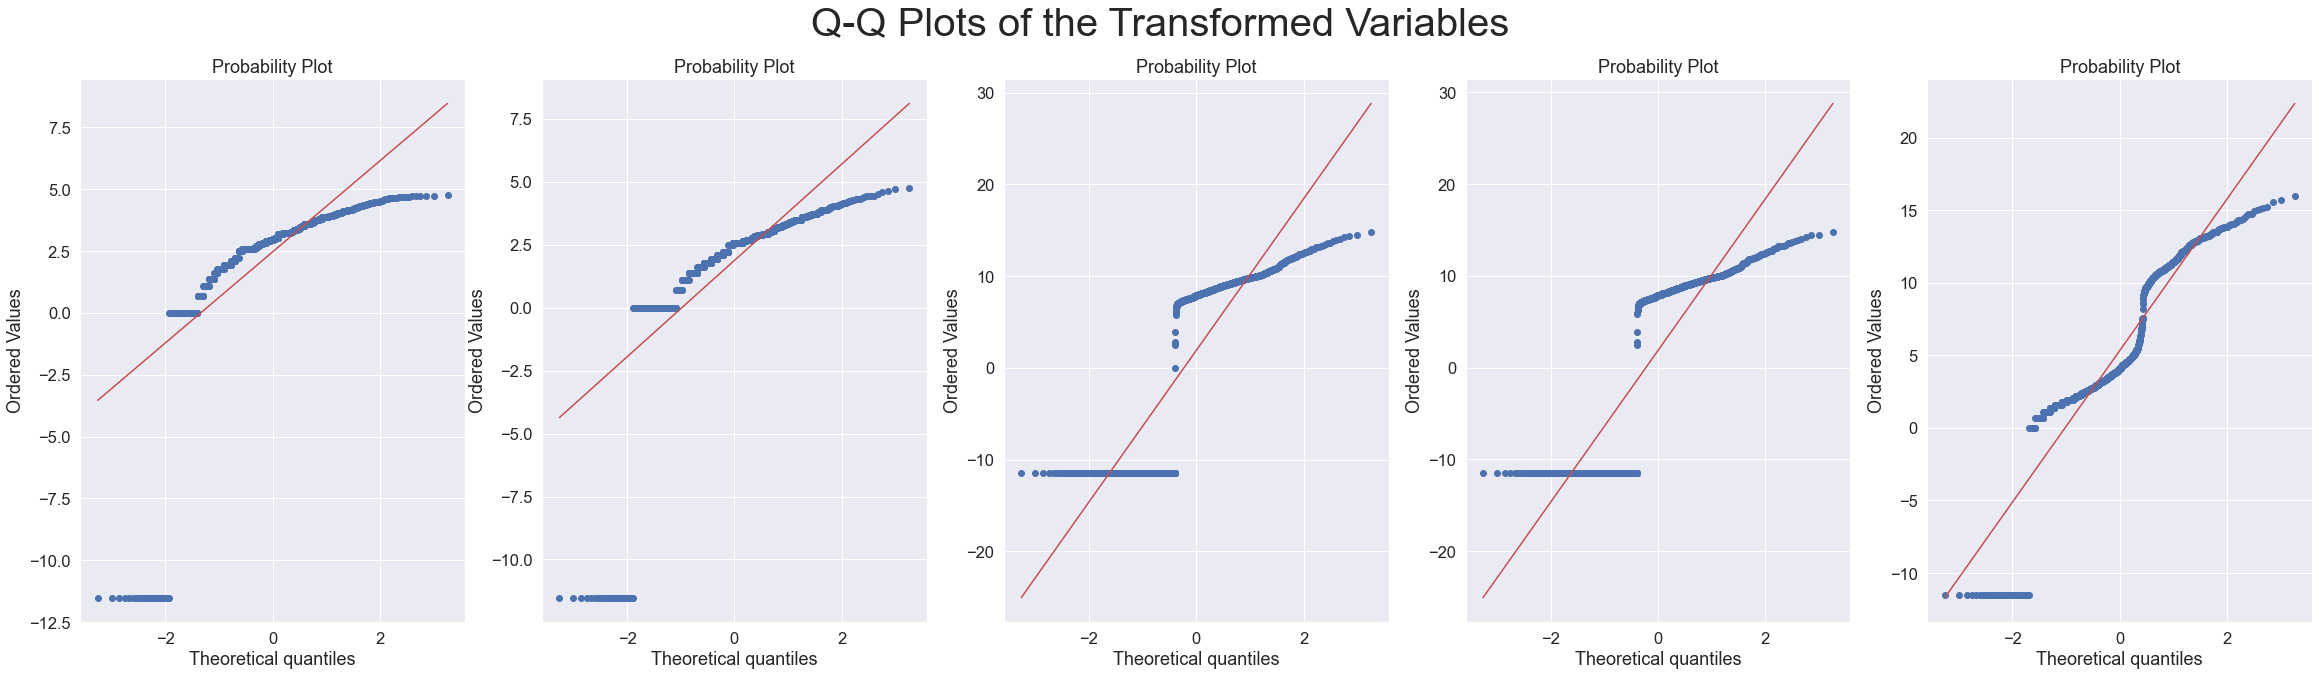

In [18]:
plt.figure(figsize = (40,10))
plt.suptitle("Visualisation of the Transformed Variables", size =40)
pos = 1
for i in variables_subset:
    plt.subplot(1,5,pos)
    sns.histplot(np.log(df[i]))
    plt.xlabel("log ("+str(i)+")")
    #sns.set(font_scale=1.5)
    pos = pos+1
plt.show()

#Q-Q plots
plt.figure(figsize = (40,10))
plt.suptitle("Q-Q Plots of the Transformed Variables", size =40)
pos = 1
for i in variables_subset:
    plt.subplot(1,5,pos)
    stats.probplot(np.log(df[i]), dist="norm", plot=plt)
    #plt.xlabel("log ("+str(i)+")")
    pos = pos+1
plt.show()

## 5. Model Building

### 5.1 Mallow's CP : Identifying the Top Competing Models

In [8]:
# Adding the transformed variables as columns in the dataset

df['l_credit_history'] = np.log(df.credit_history)
df['l_average_age'] = np.log(df.average_age)
df['l_total_monthly_payment'] = np.log(df.total_monthly_payment)
df['l_main_account_monthly_payment'] = np.log(df.main_account_monthly_payment)
df['l_main_account_tenure'] = np.log(df.main_account_tenure)
df['l_main_account_sanction_loan'] = np.log(df.main_account_sanction_loan)

In [9]:
df.head()

,main_account_sanction_loan,asset_cost,Driving_flag,credit_score,main_account_monthly_payment,last_six_month_defaulted_no,average_age,credit_history,enquirie_no,loan_default,...,main_account_tenure,Credit_level,employment_type,age,l_credit_history,l_average_age,l_total_monthly_payment,l_main_account_monthly_payment,l_main_account_tenure,l_main_account_sanction_loan
0,30838,105200,0,749,0,0,1,30,0,0,...,30838,11,0,25,3.401197,0.000000,-inf,-inf,10.336503,10.336503
1,374641,58085,0,588,9823,0,14,36,0,0,...,38,5,1,26,3.583519,2.639057,9.192482,9.192482,3.637586,12.833724
2,9910,65560,0,738,1751,0,3,3,1,0,...,5,11,0,22,1.098612,1.098612,7.467942,7.467942,1.609438,9.201300
3,53000,65090,0,774,3320,0,13,13,0,0,...,15,12,0,37,2.564949,2.564949,8.107720,8.107720,2.708050,10.878047
4,1826104,67343,0,636,9646,1,12,25,0,0,...,190,7,0,47,3.218876,2.484907,9.174299,9.174299,5.247024,14.417695


In [11]:
subdat = df[['l_main_account_sanction_loan', 'l_credit_history', 'l_average_age', 'l_total_monthly_payment', 
                  'total_outstanding_loan', 'l_main_account_monthly_payment', 'l_main_account_tenure',]].copy()

In [22]:
import itertools

In [64]:
model = smf.ols(formula='l_main_account_sanction_loan ~ l_credit_history + l_average_age + l_total_monthly_payment +total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data=df)
results = model.fit()
y = df['l_main_account_sanction_loan']
y_pred=results.fittedvalues

storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 7 # number of parameters in orginal model (includes y-intercept)

for L in range(2, len(subdat.columns[1:]) + 1):
    for subset in itertools.combinations(subdat.columns[1:], L):
        
        # join the strings in the data together
        formula1 = 'l_main_account_sanction_loan~'+'+'.join(subset)
        
        # get the cp
        results = smf.ols(formula=formula1, data = df).fit()
        y_sub = results.fittedvalues
        p = len(subset)+1 # number of parameters in the subset model (includes y-intercept)
        
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        
        # add to the dataframe
        storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)

In [85]:
storage_cp.sort_values(by = 'CP').head()

,Variables,CP
56,"(l_credit_history, l_average_age, l_total_mont...",7.0
54,"(l_credit_history, l_total_monthly_payment, to...",11.6901
53,"(l_credit_history, l_average_age, total_outsta...",19.244058
44,"(l_credit_history, total_outstanding_loan, l_m...",24.607114
51,"(l_credit_history, l_average_age, l_total_mont...",27.85919


In [82]:
#extracting the first few CP combinations
storage_cp.sort_values(by = 'CP').iloc[0,0]

('l_credit_history',
 'l_average_age',
 'l_total_monthly_payment',
 'total_outstanding_loan',
 'l_main_account_monthly_payment',
 'l_main_account_tenure')

In [83]:
storage_cp.sort_values(by = 'CP').iloc[1,0]

('l_credit_history',
 'l_total_monthly_payment',
 'total_outstanding_loan',
 'l_main_account_monthly_payment',
 'l_main_account_tenure')

In [84]:
storage_cp.sort_values(by = 'CP').iloc[2,0]

('l_credit_history',
 'l_average_age',
 'total_outstanding_loan',
 'l_main_account_monthly_payment',
 'l_main_account_tenure')

Based on the results obtained from Mallow's CP and Boruta Algorithm, we have the following OLS model.

### 5.2 OLS Models: Preliminary Analysis

### Model I:

In [12]:
# Specifying the model
ols_mod1 = smf.ols(formula = 'l_main_account_sanction_loan ~ l_credit_history + l_average_age + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data = df)

# Fitting the model
ols_fit1 = ols_mod1.fit()

# Summary
print(ols_fit1.summary())

                                 OLS Regression Results                                 
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.554
Model:                                      OLS   Adj. R-squared:                  0.552
Method:                           Least Squares   F-statistic:                     253.7
Date:                          Sun, 13 Nov 2022   Prob (F-statistic):          9.69e-211
Time:                                  20:29:29   Log-Likelihood:                -1940.3
No. Observations:                          1231   AIC:                             3895.
Df Residuals:                              1224   BIC:                             3931.
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------

From the above results we can see that on average all the predictor variables have a statistically significant impact on our main y variable. The R square also indicates a well fitted model, as it claims to explain approximately 55.4% of the variation in the observed values. 

However, when we check for perfect multicollinearity, a possible problem arises. The note at the bottom of the results table tells us that we get a large condition number which is nearly 4390000, enabling us to infer that there is possible strong multicollinearity between the variables. Hence, now we will conduct various tests to find the root of the problem and fit our model better.

### Model II:

In [13]:
# Specifying the model
ols_mod2 = smf.ols(formula = 'l_main_account_sanction_loan ~ l_credit_history + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data = df)

# Fitting the model
ols_fit2 = ols_mod2.fit()

# Summary
print(ols_fit2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.552
Model:                                      OLS   Adj. R-squared:                  0.550
Method:                           Least Squares   F-statistic:                     301.7
Date:                          Sun, 13 Nov 2022   Prob (F-statistic):          1.48e-210
Time:                                  20:45:02   Log-Likelihood:                -1943.7
No. Observations:                          1231   AIC:                             3899.
Df Residuals:                              1225   BIC:                             3930.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------

From the above results we can see that on average all the predictor variables have a statistically significant impact on our main y variable. The R square also indicates a well fitted model, as it claims to explain approximately 55.2% of the variation in the observed values. 

However, when we check for perfect multicollinearity, a possible problem arises. The note at the bottom of the results table tells us that we get a large condition number which is nearly 4390000, enabling us to infer that there is possible strong multicollinearity between the variables. Hence, now we will conduct various tests to find the root of the problem and fit our model better.

### Model III:

In [14]:
# Specifying the model
ols_mod3 = smf.ols(formula = 'l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data = df)

# Fitting the model
ols_fit3 = ols_mod3.fit()

# Summary
print(ols_fit3.summary())

                                 OLS Regression Results                                 
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.549
Model:                                      OLS   Adj. R-squared:                  0.547
Method:                           Least Squares   F-statistic:                     298.4
Date:                          Sun, 13 Nov 2022   Prob (F-statistic):          6.22e-209
Time:                                  20:46:23   Log-Likelihood:                -1947.5
No. Observations:                          1231   AIC:                             3907.
Df Residuals:                              1225   BIC:                             3938.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------

From the above results we can see that on average all the predictor variables have a statistically significant impact on our main y variable. The R square also indicates a well fitted model, as it claims to explain approximately 54.9% of the variation in the observed values. 

However, when we check for perfect multicollinearity, a possible problem arises. The note at the bottom of the results table tells us that we get a large condition number which is nearly 2450000, enabling us to infer that there is possible strong multicollinearity between the variables. Hence, now we will conduct various tests to find the root of the problem and fit our model better.

* When comparing all three models: 
  * The R square is highest for Model I
  * The AIC is lowest for Model I
  * The BIC is lowest for Model II, but the difference between Model 1 and Model 2 is extremely small
  
Hence we conclude that until now, **Model I** is our best fitted model.

### 5.3 Test for Multicollinearity: Variance Inflation Factor (VIF)

In [65]:
import patsy as pt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model I:

In [36]:
y, X = pt.dmatrices('l_main_account_sanction_loan ~ l_credit_history + l_average_age + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data = df,
                   return_type = 'dataframe')

In [37]:
X.head()

,Intercept,l_credit_history,l_average_age,l_total_monthly_payment,total_outstanding_loan,l_main_account_monthly_payment,l_main_account_tenure
0,1.0,3.401198,0.000010,-11.512925,16582.0,-11.512925,10.336503
1,1.0,3.583519,2.639058,9.192482,375168.0,9.192482,3.637586
2,1.0,1.098616,1.098616,7.467942,5080.0,7.467942,1.609440
3,1.0,2.564950,2.564950,8.107720,4700.0,8.107720,2.708051
4,1.0,3.218876,2.484907,9.174299,1359538.0,9.174299,5.247024


In [38]:
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

In [39]:
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [40]:
print(vif_df)

                         variable         VIF
0                       Intercept    5.216767
1                l_credit_history    5.524785
2                   l_average_age    5.431389
3         l_total_monthly_payment  840.669593
4          total_outstanding_loan    1.165932
5  l_main_account_monthly_payment  838.173581
6           l_main_account_tenure    3.230730


Using the VIF threshold as 10, we can see that the variables which seem to cause an error are  l_total_monthly_payment and l_main_account_monthly_payment.

### Model II:

In [41]:
y, X1 = pt.dmatrices('l_main_account_sanction_loan ~ l_credit_history + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data = df,
                   return_type = 'dataframe')

In [42]:
X1.head()

,Intercept,l_credit_history,l_total_monthly_payment,total_outstanding_loan,l_main_account_monthly_payment,l_main_account_tenure
0,1.0,3.401198,-11.512925,16582.0,-11.512925,10.336503
1,1.0,3.583519,9.192482,375168.0,9.192482,3.637586
2,1.0,1.098616,7.467942,5080.0,7.467942,1.609440
3,1.0,2.564950,8.107720,4700.0,8.107720,2.708051
4,1.0,3.218876,9.174299,1359538.0,9.174299,5.247024


In [45]:
vif_df1 = pd.DataFrame()
vif_df1['variable'] = X1.columns

In [46]:
vif_df1['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

In [47]:
print(vif_df1)

                         variable         VIF
0                       Intercept    5.140630
1                l_credit_history    1.050090
2         l_total_monthly_payment  839.740437
3          total_outstanding_loan    1.165576
4  l_main_account_monthly_payment  837.028151
5           l_main_account_tenure    3.227407


Using the VIF threshold as 4, we can see that the variables which seem to cause an error are  l_total_monthly_payment and l_main_account_monthly_payment.

### Model III:

In [48]:
y, X2 = pt.dmatrices('l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data = df,
                   return_type = 'dataframe')

In [49]:
X2.head()

,Intercept,l_credit_history,l_average_age,total_outstanding_loan,l_main_account_monthly_payment,l_main_account_tenure
0,1.0,3.401198,0.000010,16582.0,-11.512925,10.336503
1,1.0,3.583519,2.639058,375168.0,9.192482,3.637586
2,1.0,1.098616,1.098616,5080.0,7.467942,1.609440
3,1.0,2.564950,2.564950,4700.0,8.107720,2.708051
4,1.0,3.218876,2.484907,1359538.0,9.174299,5.247024


In [50]:
vif_df2 = pd.DataFrame()
vif_df2['variable'] = X2.columns

In [51]:
vif_df2['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

In [52]:
print(vif_df2)

                         variable       VIF
0                       Intercept  5.208579
1                l_credit_history  5.521038
2                   l_average_age  5.425386
3          total_outstanding_loan  1.149384
4  l_main_account_monthly_payment  3.359373
5           l_main_account_tenure  3.224408


Using the VIF threshold as 4, we can see that the variables which seem to cause an error are l_credit_history and l_average_age. However, the value is not very large.

Hence, after the above tests for VIF we conclude that **Model III** is the best fitted.

### 5.4 Test for Heteroskedasticity

### 5.4.1. Spread Level Plots

In [70]:
def spread_level(model, data):
    df_copy = df.copy()
    
    # Get the studentized residuals
    df_copy["Absolute_Studentized_Residuals"] = (np.abs(model.get_influence().resid_studentized))
    df_copy["Fitted_Values"] = (model.fittedvalues)
    
    # run regression to get slope of fitted vs resid, rlm is a robust linear model used by R
    slreg = smf.rlm("np.log(Absolute_Studentized_Residuals) ~ np.log(Fitted_Values)", df_copy).fit()
    slope = slreg.params[1]
    
    # plot values
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_title("Fitted Values vs Studentized Residuals")
    sns.regplot(x = "Fitted_Values", y = "Absolute_Studentized_Residuals", data = df_copy, lowess = True, ax = ax)
    ax.plot(df_copy.Fitted_Values.values, np.exp(slreg.fittedvalues).values)
    
    # Set to the logarithmic scale
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    # convert froms scientific notation to scalar notation
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_major_formatter(ScalarFormatter())
    
    # Resolve overlapping label bug
    ax.minorticks_off()
    
    # Set tick labels automatically
    ax.set_xticks(np.linspace(df_copy["Fitted_Values"].min(),df_copy["Fitted_Values"].max(), 6))
    ax.set_yticks(np.linspace(df_copy["Absolute_Studentized_Residuals"].min(),
                              df_copy["Absolute_Studentized_Residuals"].max(), 6))
    
    ax.grid()
    
    # return a suggested power transform of your y-variable that may correct heteroscedastcity
    # The transform is just one minus the slope of the reegression line of your fitted values vs residuals
    print("Suggested Power Transformation:", 1-slope)

In [73]:
results_1 = smf.ols('l_main_account_sanction_loan ~ l_credit_history + l_average_age + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', df).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.554
Model:                                      OLS   Adj. R-squared:                  0.552
Method:                           Least Squares   F-statistic:                     253.7
Date:                          Sun, 13 Nov 2022   Prob (F-statistic):          9.69e-211
Time:                                  12:57:56   Log-Likelihood:                -1940.3
No. Observations:                          1231   AIC:                             3895.
Df Residuals:                              1224   BIC:                             3931.
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.9496      0.076    130.221      0.000       9.800      10.099
l_credit_history                   0.1692      0.031      5.507      0.000       0.109       0.229
l_average_age                     -0.0782      0.030     -2.587      0.010      -0.137      -0.019
l_total_monthly_payment           -0.3718      0.099     -3.774      0.000      -0.565      -0.179
total_outstanding_loan          8.856e-07   3.72e-08     23.819      0.000    8.13e-07    9.59e-07
l_main_account_monthly_payment     0.4701      0.098      4.781      0.000       0.277       0.663
l_main_account_tenure              0.1931      0.011     17.893      0.000       0.172       0.214
==============================================================================
Omnibus:                      207.641   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.971
Skew:                          -0.768   Prob(JB):                    2.63e-175
Kurtosis:                       6.649   Cond. No.                     4.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suggested Power Transformation: 2.1018547585120717


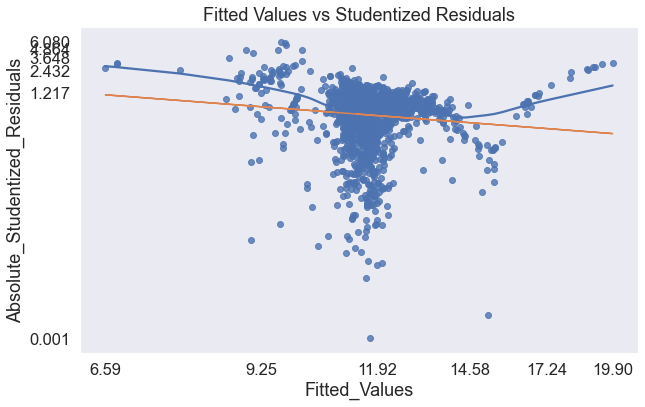

In [76]:
spread_level(results_1, df)

From the above spread level plot we can infer that there is no strong relation between the residuals and fitted values hence implying a low probability of heteroskedasticity in Model I.

### Model II:

In [101]:
results_2 = smf.ols('l_main_account_sanction_loan ~ l_credit_history + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', df).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.552
Model:                                      OLS   Adj. R-squared:                  0.550
Method:                           Least Squares   F-statistic:                     301.7
Date:                          Sun, 13 Nov 2022   Prob (F-statistic):          1.48e-210
Time:                                  14:09:23   Log-Likelihood:                -1943.7
No. Observations:                          1231   AIC:                             3899.
Df Residuals:                              1225   BIC:                             3930.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.9735      0.076    131.192      0.000       9.824      10.123
l_credit_history                   0.0977      0.013      7.276      0.000       0.071       0.124
l_total_monthly_payment           -0.3802      0.099     -3.853      0.000      -0.574      -0.187
total_outstanding_loan          8.839e-07   3.73e-08     23.723      0.000    8.11e-07    9.57e-07
l_main_account_monthly_payment     0.4795      0.098      4.869      0.000       0.286       0.673
l_main_account_tenure              0.1940      0.011     17.944      0.000       0.173       0.215
==============================================================================
Omnibus:                      212.076   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.525
Skew:                          -0.781   Prob(JB):                    4.51e-181
Kurtosis:                       6.708   Cond. No.                     4.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suggested Power Transformation: 2.0834266915704425


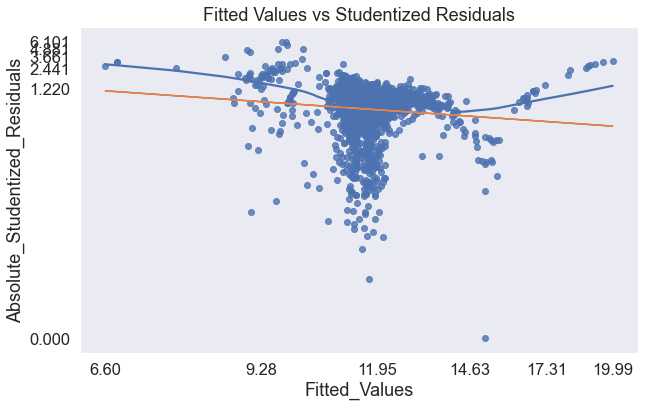

In [102]:
spread_level(results_2, df)

From the above spread level plot we can infer that there is no strong relation between the residuals and fitted values hence implying a low probability of heteroskedasticity in Model II.

### Model III:

In [103]:
results_3 = smf.ols('l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', df).fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.549
Model:                                      OLS   Adj. R-squared:                  0.547
Method:                           Least Squares   F-statistic:                     298.4
Date:                          Sun, 13 Nov 2022   Prob (F-statistic):          6.22e-209
Time:                                  14:10:58   Log-Likelihood:                -1947.5
No. Observations:                          1231   AIC:                             3907.
Df Residuals:                              1225   BIC:                             3938.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.9382      0.077    129.476      0.000       9.788      10.089
l_credit_history                   0.1722      0.031      5.578      0.000       0.112       0.233
l_average_age                     -0.0820      0.030     -2.699      0.007      -0.142      -0.022
total_outstanding_loan          8.689e-07   3.71e-08     23.411      0.000    7.96e-07    9.42e-07
l_main_account_monthly_payment     0.0998      0.006     15.940      0.000       0.087       0.112
l_main_account_tenure              0.1949      0.011     17.981      0.000       0.174       0.216
==============================================================================
Omnibus:                      202.843   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.801
Skew:                          -0.758   Prob(JB):                    2.29e-166
Kurtosis:                       6.546   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suggested Power Transformation: 2.077543943461542


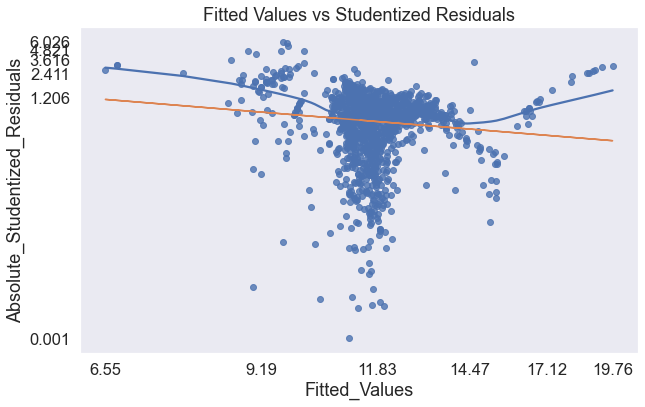

In [104]:
spread_level(results_3, df)

From the above spread level plot we can infer that there is no strong relation between the residuals and fitted values hence implying a low probability of heteroskedasticity in Model III.

### 5.4.2. Bruesch-Pagan Test

### Model I:

In [78]:
# pull out squared residuals
df["res2"] = results_1.resid**2

# try to predict the squared residuals using a linear combination of our variables
aux_reg = smf.ols('res2 ~ l_credit_history + l_average_age + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', df).fit()

# Get the regression f-statistic (f-test version)
f = aux_reg.fvalue
fp = aux_reg.f_pvalue

print("The F-Statistic for the Auxiliary Regression is: "+ str(f) +" and the P-Value is: "+ str(fp))

The F-Statistic for the Auxiliary Regression is: 64.64087162881013 and the P-Value is: 7.622288406786608e-70


From the above test we can conclude that since the p-value is small, we reject our null hypothesis that variance is constant and conclude that heteroskedasticity is present.

### Model II: 

In [105]:
# pull out squared residuals
df["res2"] = results_2.resid**2

# try to predict the squared residuals using a linear combination of our variables
aux_reg_2 = smf.ols('res2 ~ l_credit_history + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', df).fit()

# Get the regression f-statistic (f-test version)
f = aux_reg_2.fvalue
fp = aux_reg_2.f_pvalue

print("The F-Statistic for the Auxiliary Regression is: "+ str(f) +" and the P-Value is: "+ str(fp))

The F-Statistic for the Auxiliary Regression is: 77.38921069398798 and the P-Value is: 1.298162717724522e-70


From the above test we can conclude that since the p-value is small, we reject our null hypothesis that variance is constant and conclude that heteroskedasticity is present.

### Model III: 

In [107]:
# pull out squared residuals
df["res2"] = results_3.resid**2

# try to predict the squared residuals using a linear combination of our variables
aux_reg_3 = smf.ols('res2 ~  l_credit_history + l_average_age + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', df).fit()

# Get the regression f-statistic (f-test version)
f = aux_reg_3.fvalue
fp = aux_reg_3.f_pvalue

print("The F-Statistic for the Auxiliary Regression is: "+ str(f) +" and the P-Value is: "+ str(fp))

The F-Statistic for the Auxiliary Regression is: 80.11892868596081 and the P-Value is: 7.717535530963041e-73


From the above test we can conclude that since the p-value is small, we reject our null hypothesis that variance is constant and conclude that heteroskedasticity is present.

### 5.5 Diagnostic Plots

### Model I:

### 5.5.1. Cook's Distance Plot

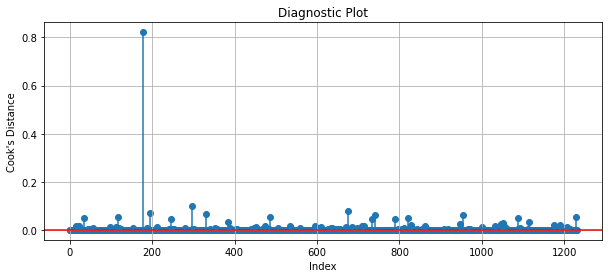

In [40]:
cooks_distance = results_1.get_influence().cooks_distance
plt.figure(figsize = (10, 4))
plt.scatter(df.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = df.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()

### 5.5.2. Influence Plot

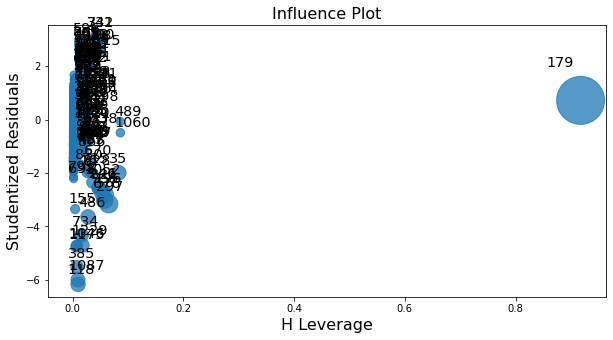

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(results_1, ax = ax, criterion="cooks")

The above plots show that only one observation heavily influences Model 1 when removed and thus, has a relatively large Cook's Distance. 179 is an influential observation and could change the fit of the model drastically.

### 5.5.3. Residuals Plot

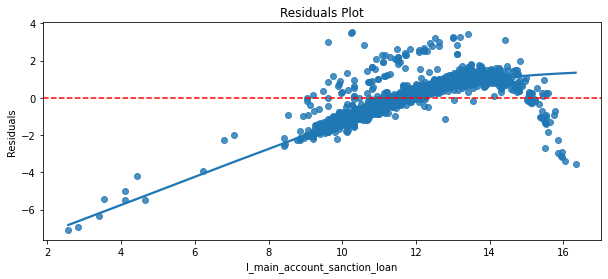

In [25]:
plt.figure(figsize = (10, 4))
sns.regplot(x = df[['l_main_account_sanction_loan']], 
            y = results_1.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

### Model II:

### 5.5.1. Cook's Distance Plot

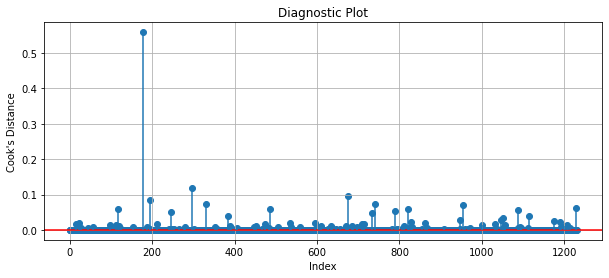

In [30]:
cooks_distance = results_2.get_influence().cooks_distance
plt.figure(figsize = (10, 4))
plt.scatter(df.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = df.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()

### 5.5.2. Influence Plot

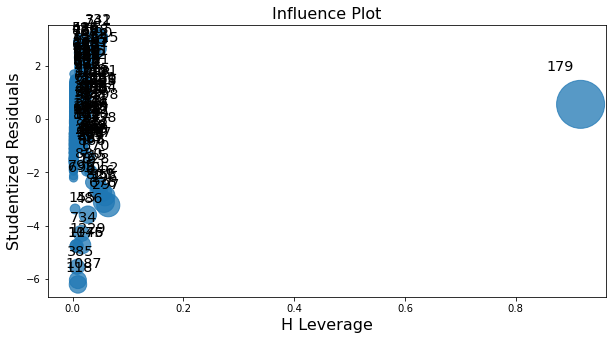

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(results_2, ax = ax, criterion="cooks")

The above plots show that only one observation heavily influences Model 2 when removed and thus, has a relatively large Cook's Distance. 179 is an influential observation and could change the fit of the model drastically.

### 5.5.3. Residuals Plot

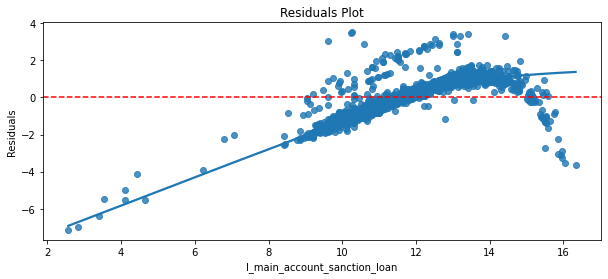

In [32]:
plt.figure(figsize = (10, 4))
sns.regplot(x = df[['l_main_account_sanction_loan']], 
            y = results_2.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

### Model III:

### 5.5.1. Cook's Distance Plot

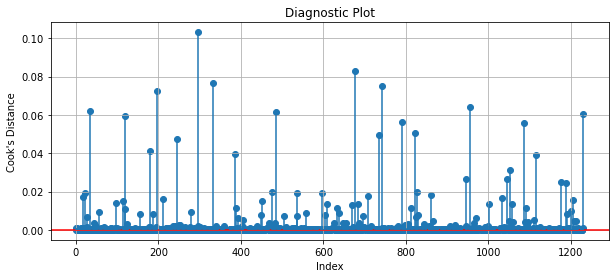

In [33]:
cooks_distance = results_3.get_influence().cooks_distance
plt.figure(figsize = (10, 4))
plt.scatter(df.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = df.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()

### 5.5.2. Influence Plot

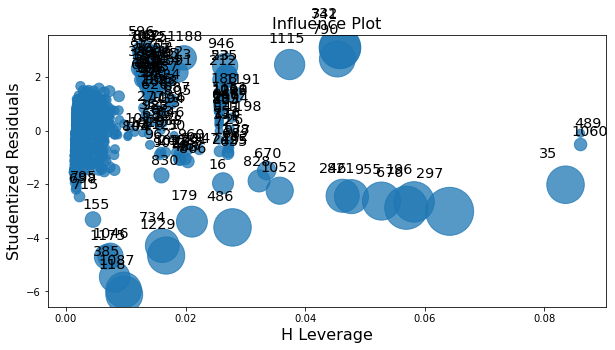

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(results_3, ax = ax, criterion="cooks")

The above plots show that many observations heavily influence Model 3 when removed and thus, has a relatively large Cook's Distance. Here, there are more observations with higher leverage. It is interesting to see that observation 179 is not influential at all.

### 5.5.3. Residuals Plot

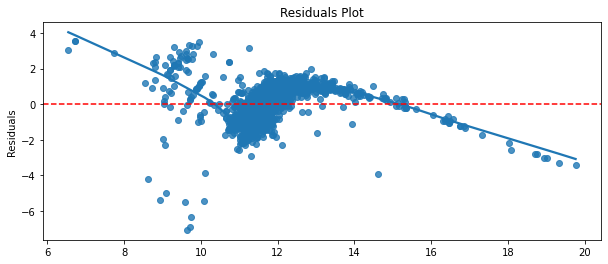

In [36]:
plt.figure(figsize = (10, 4))
sns.regplot(x = results_3.fittedvalues, 
            y = results_3.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

From the above three models, we find that **Model I** and **Model II** have the lowest number of outliers and thus, would be better to fit a model after removal of the one observation. Given the characteristics of this dataset, no particular observation or customer is more important to the model than its fit, and hence the removal of outlier is justified.

Since we get **Model I** as the better fit model out of all the above tests, we will choose this model on the basis of majority and run model misspecification tests to decide on final model.

### 5.5.4. Dropping influential observation

In [57]:
datanew = df[cooks_distance[0]<4/len(cooks_distance[0])]

In [58]:
results_1_dropped = smf.ols('l_main_account_sanction_loan ~ l_credit_history + l_average_age + l_total_monthly_payment + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', data = datanew).fit()
results_1_dropped.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.733
Model:                                      OLS   Adj. R-squared:                  0.732
Method:                           Least Squares   F-statistic:                     525.0
Date:                          Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                                  23:19:45   Log-Likelihood:                -1406.3
No. Observations:                          1152   AIC:                             2827.
Df Residuals:                              1145   BIC:                             2862.
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          8.6790      0.089     97.842      0.000       8.505       8.853
l_credit_history                   0.1559      0.024      6.421      0.000       0.108       0.203
l_average_age                     -0.0481      0.024     -2.001      0.046      -0.095      -0.001
l_total_monthly_payment           -0.6085      0.384     -1.584      0.113      -1.362       0.145
total_outstanding_loan          1.004e-06   3.89e-08     25.813      0.000    9.28e-07    1.08e-06
l_main_account_monthly_payment     0.7739      0.384      2.014      0.044       0.020       1.528
l_main_account_tenure              0.3730      0.014     27.496      0.000       0.346       0.400
==============================================================================
Omnibus:                       93.345   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.496
Skew:                           0.443   Prob(JB):                     9.87e-53
Kurtosis:                       5.050   Cond. No.                     1.80e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We find that this model fit is better than the original Model I after dropping influential observation as it has a higher adjusted R-squared value and lower AIC and BIC values.

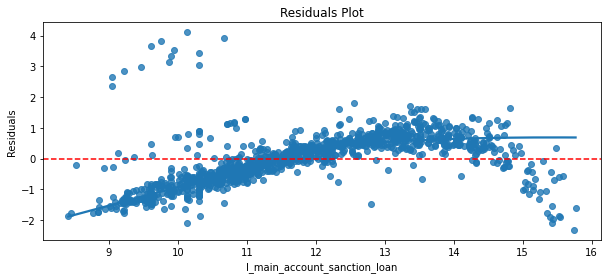

In [61]:
#checking residuals plot

plt.figure(figsize = (10, 4))
sns.regplot(x = datanew[['l_main_account_sanction_loan']], 
            y = results_1_dropped.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

The residuals seem to have a quadratic relationship with the response variable, defying heteroskedasticity assumptions. This model will further be refined by checking for model misspecification and accordingly adding required quadratic terms.

### 5.6 Test for Model Misspecification : Ramsey RESET

In [46]:
import statsmodels.stats.outliers_influence as smo

In [62]:
reset_out = smo.reset_ramsey(res = results_1_dropped, degree = 2)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=115.75546747943442, p=8.77579524102876e-26, df_denom=1.14e+03, df_num=1>

The p-value here is very small implying that the model is misspecified and thus, there is a requirement of including quadratic terms in the model. This also confirms the result obtained from the previous residual plot as well.

### 5.7 Mitigation of Issues and Amending Model

### 5.7.1 Mitigation of Multicollinearity

This model is essentially Model I which had high multicollinearity. To mitigate the problems that arise from multicollinearity, one available solution is to remove the variable with high VIF from the regression model.

In this case, we find that 'l_total_monthly_payment' and 'l_main_account_monthly_payment' have high VIFs, out of which the coefficient for **'l_total_monthly_payment'** is insignificant due to high p-value. Hence, it is not significantly impacting the response variable and contributing to VIF. Hence, we will drop this variable.

In [90]:
results_1_VIF = smf.ols('l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan + l_main_account_monthly_payment + l_main_account_tenure', datanew).fit()
results_1_VIF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.733
Model:                                      OLS   Adj. R-squared:                  0.732
Method:                           Least Squares   F-statistic:                     628.6
Date:                          Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                                  00:24:39   Log-Likelihood:                -1407.5
No. Observations:                          1152   AIC:                             2827.
Df Residuals:                              1146   BIC:                             2857.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          8.6768      0.089     97.765      0.000       8.503       8.851
l_credit_history                   0.1529      0.024      6.314      0.000       0.105       0.200
l_average_age                     -0.0453      0.024     -1.887      0.059      -0.092       0.002
total_outstanding_loan          1.003e-06   3.89e-08     25.768      0.000    9.26e-07    1.08e-06
l_main_account_monthly_payment     0.1655      0.007     25.125      0.000       0.153       0.178
l_main_account_tenure              0.3734      0.014     27.514      0.000       0.347       0.400
==============================================================================
Omnibus:                       94.062   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.803
Skew:                           0.446   Prob(JB):                     3.11e-53
Kurtosis:                       5.059   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, our model's parameters have improved compared to the original model's with 73.2% of the variance in response variable explained by the model and significant predictors. Multicollinearity is still present in the model, however, we will not remove further variables as they hold economic and statistical significance, and provide valuable information about customer behaviour.

### Running Ramsey RESET Test again

In [91]:
reset_out = smo.reset_ramsey(res = results_1_VIF, degree = 2)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=120.48009696897367, p=1.0105470391280501e-26, df_denom=1.14e+03, df_num=1>

The p-value is still small (as expected) implying that the model requires some quadratic terms.

### 5.7.2 Identifying Potential Quadratic Terms

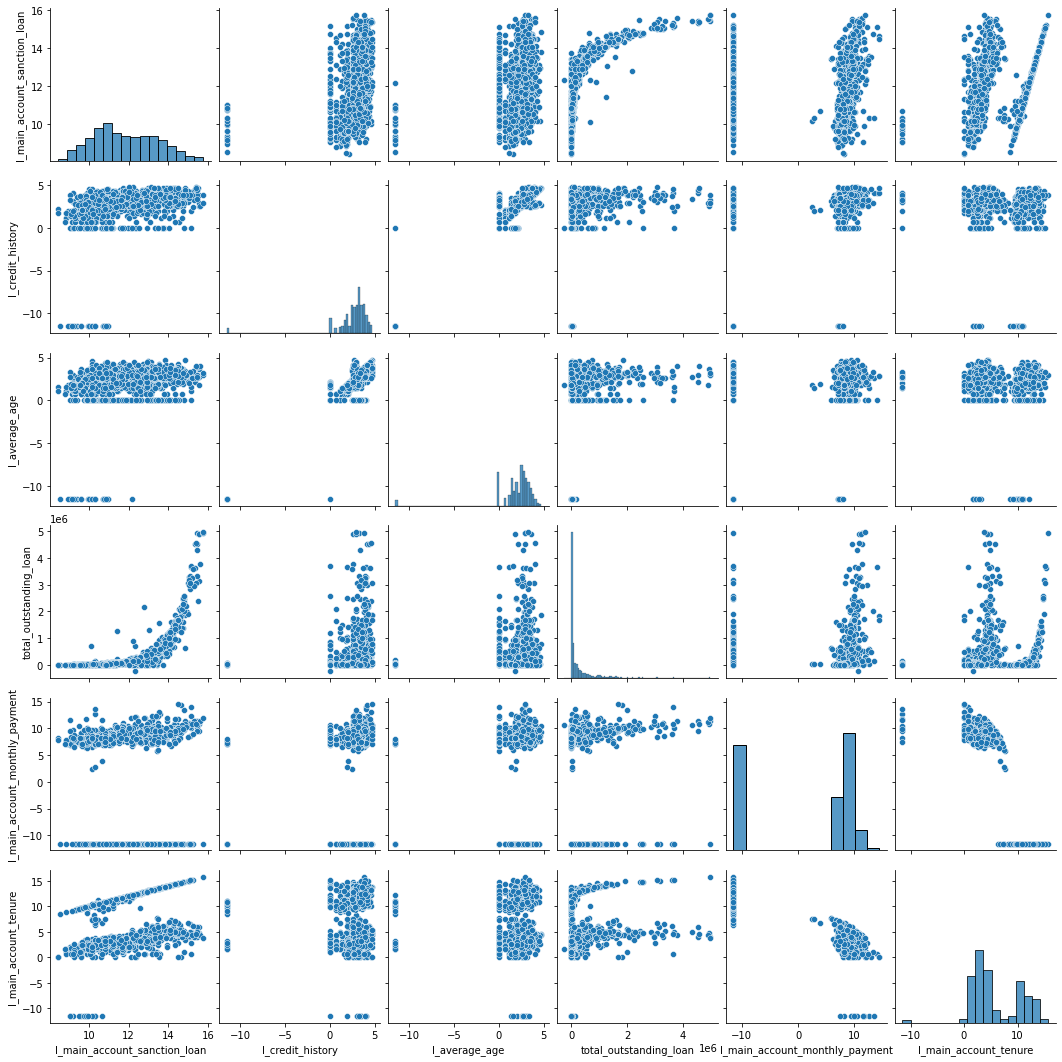

In [89]:
sub_df =  datanew[['l_main_account_sanction_loan','l_credit_history', 'l_average_age', 'total_outstanding_loan', 
              'l_main_account_monthly_payment','l_main_account_tenure']]

sns.pairplot(sub_df)

The predictor **'total_outstanding_loan'** has a clear quadratic relationship with the response variable. We will include this in the model and run Ramsey reset test again to check for misspecification.

### Running Ramsey RESET Test again

In [98]:
results_1_quad = smf.ols('l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan + \
                        l_main_account_monthly_payment + l_main_account_tenure + I(total_outstanding_loan**2)', datanew).fit()
reset_out1 = smo.reset_ramsey(res = results_1_quad, degree = 2)
reset_out1

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.378981405585569, p=0.1232542631074301, df_denom=1.14e+03, df_num=1>

The p-value is high and this indicates that the model is not misspecified. The required quadratic terms have been included in the model.

## 5.8 Final Best Fitted Model

$$l\_main\_account\_sanction\_loan = \beta_0+ \beta_1 l\_credit\_history +\beta_2 l\_average\_age +\beta_3 total\_outstanding\_loan +\beta_4 l\_main\_account\_monthly\_payment +\beta_5 l\_main\_account\_tenure + \beta_6 (total\_outstanding\_loan)^2 + e_i$$

## Robustness Check for Selected Model

### 5.8.1 Bootstrapping

In [108]:
est = smf.ols('l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan + \
            l_main_account_monthly_payment + l_main_account_tenure + I(total_outstanding_loan**2)', datanew).fit()


n_boots = 300

boot_slopes1, boot_slopes2, boot_slopes3, boot_slopes4, boot_slopes5, boot_slopes6  = [], [], [], [], [], []

boot_interc = []
boot_adjR2 = []
n_points = datanew.shape[0]

plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
    sample_datanew = datanew.sample(n=n_points, replace=True)
 # fit a linear regression
    ols_model_temp = smf.ols(formula = 'l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan+\
            l_main_account_monthly_payment + l_main_account_tenure + I(total_outstanding_loan**2)', data=sample_datanew)  
    results_temp = ols_model_temp.fit()
 
 # append coefficients
    boot_interc.append(results_temp.params[0])
    boot_slopes1.append(results_temp.params[1])
    boot_slopes2.append(results_temp.params[2])
    boot_slopes3.append(results_temp.params[3])
    boot_slopes4.append(results_temp.params[4])
    boot_slopes5.append(results_temp.params[5])
    boot_slopes6.append(results_temp.params[6])

    boot_adjR2.append(results_temp.rsquared_adj)

<Figure size 432x288 with 0 Axes>

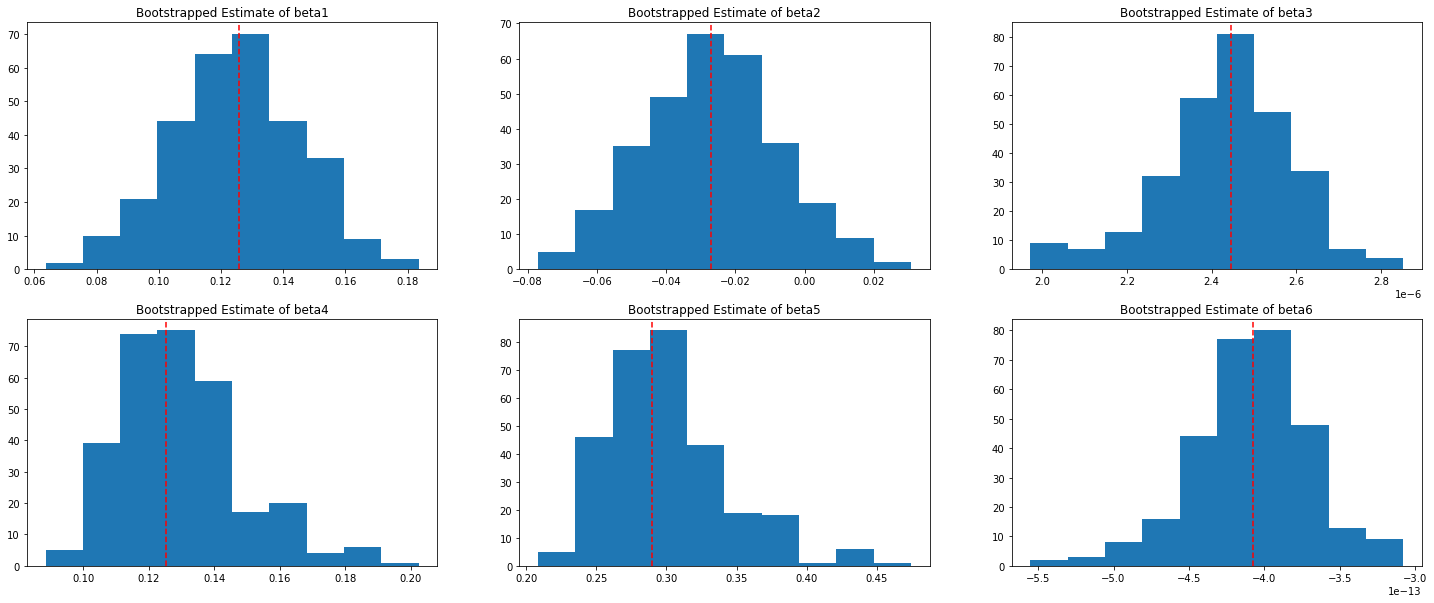

In [113]:
# histogram of bootstrapped estimates
fig, ax = plt.subplots(2, 3)

fig.set_size_inches(25, 10)

ax[0,0].set_title('Bootstrapped Estimate of beta1')
ax[0, 0].hist(boot_slopes1) #row=0, col=0
ax[0, 0].axvline(x=est.params[1],color='red', linestyle='--')

ax[0,1].set_title('Bootstrapped Estimate of beta2')
ax[0, 1].hist(boot_slopes2) #row=0, col=1
ax[0, 1].axvline(x=est.params[2],color='red', linestyle='--')

ax[0,2].set_title('Bootstrapped Estimate of beta3')
ax[0, 2].hist(boot_slopes3) #row=0, col=2
ax[0, 2].axvline(x=est.params[3],color='red', linestyle='--')

ax[1,0].set_title('Bootstrapped Estimate of beta4')
ax[1, 0].hist(boot_slopes4) #row=1, col=0
ax[1, 0].axvline(x=est.params[4],color='red', linestyle='--')

ax[1,1].set_title('Bootstrapped Estimate of beta5')
ax[1, 1].hist(boot_slopes5) #row=1, col=1
ax[1, 1].axvline(x=est.params[5],color='red', linestyle='--')

ax[1,2].set_title('Bootstrapped Estimate of beta6')
ax[1, 2].hist(boot_slopes6) #row=1, col=2
ax[1, 2].axvline(x=est.params[6],color='red', linestyle='--')


### 5.8.2 Cross Validation for Model Performance Evaluation

Cross validation of the model is nevessary to ensure there is no bias while running the regression model and that the model is robust enough when sampled for different sections of the observations. Here, we use K-fold cross validation with 5 folds by splitting the data into training and testing sets and repeating such splits differently over 5 rounds to remove biasness in splitting. 

At each round of cross validation, the regression is performed using the training dataset. When using this model to predict on the testing dataset, the predictions are tested against the real values and an RMSE is calculated. This RMSE gives the average amount by which the model's predictions are off the true values. This helps to evaluate the model performance on the basis of a set threshold that the stakeholders may have. Lower the RMSE, better the model!

In [119]:
#adding quadratic term to datanew table
datanew["squared_tol"] = datanew["total_outstanding_loan"]**2

In [121]:
# 5 fold cross validation
# Perform 5-fold Cross Validation
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# l_main_account_sanction_loan ~ l_credit_history + l_average_age + total_outstanding_loan+l_main_account_monthly_payment +
# l_main_account_tenure + I(total_outstanding_loan**2)

# Define model vars
x = datanew[['l_credit_history' , 'l_average_age' ,'total_outstanding_loan' , 'l_main_account_monthly_payment' , 
        'l_main_account_tenure' , 'squared_tol']]
y = datanew[['l_main_account_sanction_loan']]

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', scores)

5-Fold CV RMSE Scores: [-0.72664025 -0.71676075 -0.74743438 -0.72558882 -0.74005559]


In [131]:
print('The average RMSE is: ', np.mean(scores))

The average RMSE is:  -0.7312959580418499


The average RMSE value indicates that our model's predictions, on average, are off by 0.73 from the real values.

From the above robustness checks, we determine that our model is well fitted for the dataset and could provide basis for fruitful economic implications based on statistical validity.

## 5.9 Results and Conclusion

In [99]:
results_1_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     l_main_account_sanction_loan   R-squared:                       0.794
Model:                                      OLS   Adj. R-squared:                  0.793
Method:                           Least Squares   F-statistic:                     737.1
Date:                          Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                                  00:42:30   Log-Likelihood:                -1256.8
No. Observations:                          1152   AIC:                             2528.
Df Residuals:                              1145   BIC:                             2563.
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          9.0252      0.080    112.620      0.000       8.868       9.182
l_credit_history                   0.1258      0.021      5.904      0.000       0.084       0.168
l_average_age                     -0.0272      0.021     -1.289      0.198      -0.069       0.014
total_outstanding_loan          2.445e-06   8.51e-08     28.734      0.000    2.28e-06    2.61e-06
l_main_account_monthly_payment     0.1252      0.006     20.261      0.000       0.113       0.137
l_main_account_tenure              0.2895      0.013     22.713      0.000       0.264       0.314
I(total_outstanding_loan ** 2) -4.072e-13    2.2e-14    -18.512      0.000    -4.5e-13   -3.64e-13
==============================================================================
Omnibus:                       31.875   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.311
Skew:                           0.215   Prob(JB):                     1.61e-12
Kurtosis:                       3.973   Cond. No.                     1.00e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.9.1 Inferences

### Statistical Inference

- This model has a much higher adjusted R-squared, explaining 79.3% of the variation in response variable
- Significant predictor variables
- Multicollineairty still exists in the model, which is expected, but it has been reduced from before and problematic variables have been dropped
- AIC and BIC are lower
- Skewness and Kurtosis look good with skewness ~ 0 and kurtosis ~ 4
- Heteroscedasticity still exists as is evident from the low JB test p-value and the graph below

### Economic Inference

From our results we can conclude that the tenure i.e. the period of time a person has had an account at the credit agency has the strongest impact on the amount of loan that is sanctioned to the individual. This can be inferred as with a 1% increase in the tenure, the amount of loan increases by 28.95%. 

Additional interesting inferences are for credit history, as credit history improves by 1%, the amount of loan sanctioned increases by 12.58%. Similarly, a 1% change in the monthly payment of the main account, increases the amount of loan by 12.52%. Total outstanding loan stands to have nearly no impact on the sanction amount with regard to magnitude.

### 5.9.2 Facilitating Potential Recommendations

Based on our statistical analysis, we conclude the following recommendations for the car buyers and credit agencies: 

(1) Car buyers should maintain good credit history, ensure monthly payment on all their existing loans, buy vehicles with extended life-time and keep outstanding loans manageable to ensure higher loan sanction amounts. Considering all other factors that determine the loan sanction amount for an individual, these are the core factors that a car buyer should be aware of. 

(2) Credit agency should also look into these factors at more granular level so that the car buyers don't default on their loans. 
